In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/archive/CVD_cleaned.csv")
#https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [3]:
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.isnull().sum() > 0

General_Health                  False
Checkup                         False
Exercise                        False
Heart_Disease                   False
Skin_Cancer                     False
Other_Cancer                    False
Depression                      False
Diabetes                        False
Arthritis                       False
Sex                             False
Age_Category                    False
Height_(cm)                     False
Weight_(kg)                     False
BMI                             False
Smoking_History                 False
Alcohol_Consumption             False
Fruit_Consumption               False
Green_Vegetables_Consumption    False
FriedPotato_Consumption         False
dtype: bool

1. Verifiquei a presença de valores nulos no código e constatei que não havia nenhum.

2. Realizei a conversão dos dados que eram não numéricos, incluindo variáveis binárias e categóricas ordinais, para formatos numéricos, a fim de torná-los compatíveis com os algoritmos em Python.

- As variáveis binárias foram codificadas como 0 e 1.
- No caso das variáveis categóricas ordinais, realizei a ordenação numérica. Por exemplo, na variável 'General_Health', substituí os valores 'Poor' por 0, 'Fair' por 1, 'Good' por 2, 'Very Good' por 3 e 'Excellent' por 4. 

    Isso permitiu que os algoritmos de análise e modelagem de dados pudessem operar com compatibilidade e de maneira apropriada.


In [5]:
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

'Poor', 'Very Good', 'Good', 'Fair', 'Excellent' == variable ordinal 

In [6]:
General_Healthmap = {'Poor' : 0 , 'Very Good': 3, 'Good': 2, 'Fair' : 1, 'Excellent' : 4}

df['General_Health'] =  df['General_Health'].map(General_Healthmap)
df['General_Health'].unique()

array([0, 3, 2, 1, 4], dtype=int64)

In [7]:
yesmap = {'Yes' : 1, 'No' : 0}
yesmap

{'Yes': 1, 'No': 0}

In [8]:
df['Exercise'] = df['Exercise'].map(yesmap)
df['Exercise']

0         0
1         0
2         1
3         1
4         0
         ..
308849    1
308850    1
308851    1
308852    1
308853    1
Name: Exercise, Length: 308854, dtype: int64

In [9]:
df['Heart_Disease'] = df['Heart_Disease'].map(yesmap)
df['Heart_Disease']

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 308854, dtype: int64

In [10]:
df['Depression'] = df['Depression'].map(yesmap)
df['Depression']

0         0
1         0
2         0
3         0
4         0
         ..
308849    0
308850    0
308851    1
308852    0
308853    0
Name: Depression, Length: 308854, dtype: int64

In [11]:
df['Alcohol_Consumption']

0         0.0
1         0.0
2         4.0
3         0.0
4         0.0
         ... 
308849    4.0
308850    8.0
308851    4.0
308852    3.0
308853    1.0
Name: Alcohol_Consumption, Length: 308854, dtype: float64

In [12]:
df['Skin_Cancer'] = df['Skin_Cancer'].map(yesmap)
df['Skin_Cancer']

0         0
1         0
2         0
3         0
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Skin_Cancer, Length: 308854, dtype: int64

In [13]:
df['Other_Cancer'] = df['Other_Cancer'].map(yesmap)
df['Other_Cancer']

0         0
1         0
2         0
3         0
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Other_Cancer, Length: 308854, dtype: int64

In [14]:
df['Arthritis']=df['Arthritis'].map(yesmap)
df['Arthritis']

0         1
1         0
2         0
3         0
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Arthritis, Length: 308854, dtype: int64

In [15]:
##sex is binary male = 1
sexmap = {'Male' : 1, 'Female' : 0}

In [16]:
df['IsMale'] = df['Sex'].map(sexmap)
df['IsMale']
df.drop(columns='Sex', inplace = True)

In [17]:
df['Smoking_History'] = df['Smoking_History'].map(yesmap)
df['Smoking_History']

0         1
1         0
2         0
3         0
4         1
         ..
308849    0
308850    0
308851    1
308852    0
308853    0
Name: Smoking_History, Length: 308854, dtype: int64

In [18]:
df['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [19]:
CheckUpmap = {'Within the past year' : 0 , 'Within the past 2 years' : 1,  'Within the past 5 years' : 2 , '5 or more years ago' : 3, 
                'Never' : 4}
CheckUpmap

{'Within the past year': 0,
 'Within the past 2 years': 1,
 'Within the past 5 years': 2,
 '5 or more years ago': 3,
 'Never': 4}

In [20]:
df['Checkup'] = df['Checkup'].map(CheckUpmap)
df['Checkup'].unique()


array([1, 0, 3, 2, 4], dtype=int64)

In [21]:
diabetes = pd.get_dummies(data = df['Diabetes'], prefix = "Diabetes_")
diabetes.head()

df = pd.concat([df, diabetes], axis=1)
df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,IsMale,Diabetes__No,"Diabetes__No, pre-diabetes or borderline diabetes",Diabetes__Yes,"Diabetes__Yes, but female told only during pregnancy"
0,0,1,0,0,0,0,0,No,1,70-74,...,1,0.0,30.0,16.0,12.0,0,1,0,0,0
1,3,0,0,1,0,0,0,Yes,0,70-74,...,0,0.0,30.0,0.0,4.0,0,0,0,1,0
2,3,0,1,0,0,0,0,Yes,0,60-64,...,0,4.0,12.0,3.0,16.0,0,0,0,1,0
3,0,0,1,1,0,0,0,Yes,0,75-79,...,0,0.0,30.0,30.0,8.0,1,0,0,1,0
4,2,0,0,0,0,0,0,No,0,80+,...,1,0.0,8.0,4.0,0.0,1,1,0,0,0


In [22]:
df.drop(columns='Diabetes' , inplace=True)

In [23]:
df['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [24]:

Agecatmap = {'18-24' : 1 ,  '25-29' : 2, '30-34' : 3,  '35-39' : 4, '40-44' : 5 , '45-49' : 6,'50-54' : 7, '55-59' : 8 ,'60-64' : 9,  '65-69' : 10 ,'70-74' : 11 ,'75-79' : 12, '80+' : 13}

In [25]:
df['Age_Category'] = df['Age_Category'].map(Agecatmap)
df['Age_Category'].unique()

array([11,  9, 12, 13, 10,  7,  6,  1,  3,  8,  4,  5,  2], dtype=int64)

In [26]:
df.isnull().sum().sum() ##0

0

In [27]:
##para colocar 'Heart Disease como ultima coluna para facilitar a visualização'
dfhs = df['Heart_Disease']
df.drop(columns='Heart_Disease', inplace=True)
df['Heart_Disease'] = dfhs

In [28]:
df

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,IsMale,Diabetes__No,"Diabetes__No, pre-diabetes or borderline diabetes",Diabetes__Yes,"Diabetes__Yes, but female told only during pregnancy",Heart_Disease
0,0,1,0,0,0,0,1,11,150.0,32.66,...,0.0,30.0,16.0,12.0,0,1,0,0,0,0
1,3,0,0,0,0,0,0,11,165.0,77.11,...,0.0,30.0,0.0,4.0,0,0,0,1,0,1
2,3,0,1,0,0,0,0,9,163.0,88.45,...,4.0,12.0,3.0,16.0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,12,180.0,93.44,...,0.0,30.0,30.0,8.0,1,0,0,1,0,1
4,2,0,0,0,0,0,0,13,191.0,88.45,...,0.0,8.0,4.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,0,1,0,0,0,0,2,168.0,81.65,...,4.0,30.0,8.0,0.0,1,1,0,0,0,0
308850,1,2,1,0,0,0,0,10,180.0,69.85,...,8.0,15.0,60.0,4.0,1,0,0,1,0,0
308851,3,3,1,0,0,1,0,3,157.0,61.23,...,4.0,40.0,8.0,4.0,0,0,0,0,1,0
308852,3,0,1,0,0,0,0,10,183.0,79.38,...,3.0,30.0,12.0,0.0,1,1,0,0,0,0


In [29]:
#Visualização

In [30]:
matrix = (df.corr())

Text(0.5, 1.0, 'Matrix de Correlação Valores')

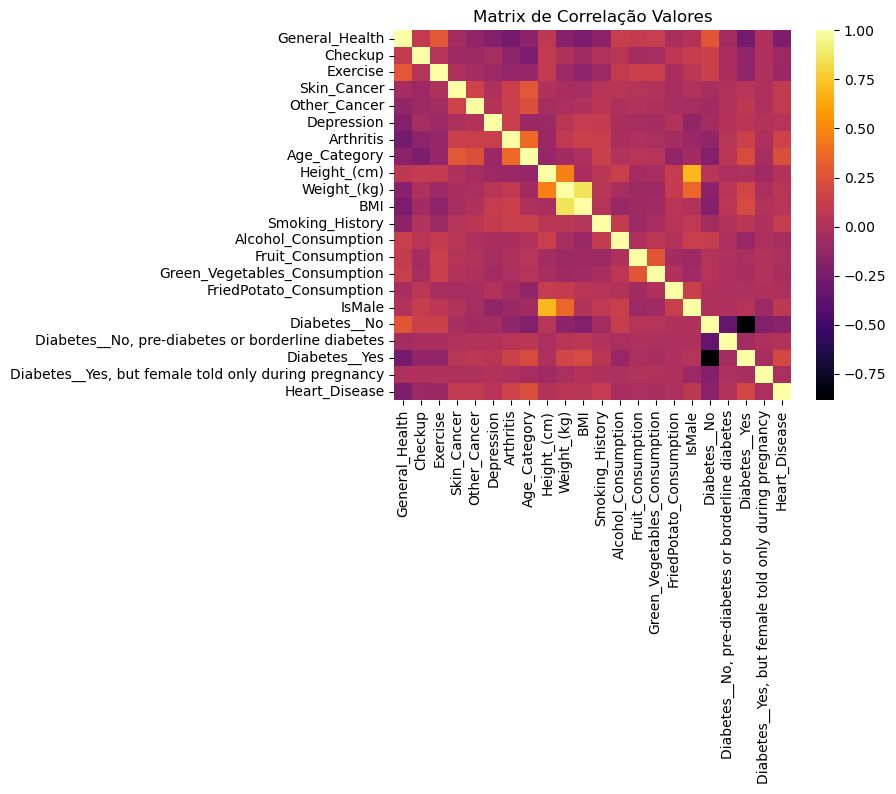

In [31]:
sns.heatmap(matrix, cmap='inferno')
plt.title('Matrix de Correlação Valores')

In [32]:
abs(matrix['Heart_Disease']).sort_values(ascending= False)


Heart_Disease                                           1.000000
General_Health                                          0.232503
Age_Category                                            0.229011
Diabetes__Yes                                           0.181072
Diabetes__No                                            0.169569
Arthritis                                               0.153913
Smoking_History                                         0.107797
Exercise                                                0.096347
Other_Cancer                                            0.092387
Skin_Cancer                                             0.090848
Checkup                                                 0.085596
IsMale                                                  0.072595
Weight_(kg)                                             0.045875
BMI                                                     0.042666
Alcohol_Consumption                                     0.036569
Depression               

## Visualization

Text(0.5, 1.0, "Box Plot 'Heart Disease' 'General Health'")

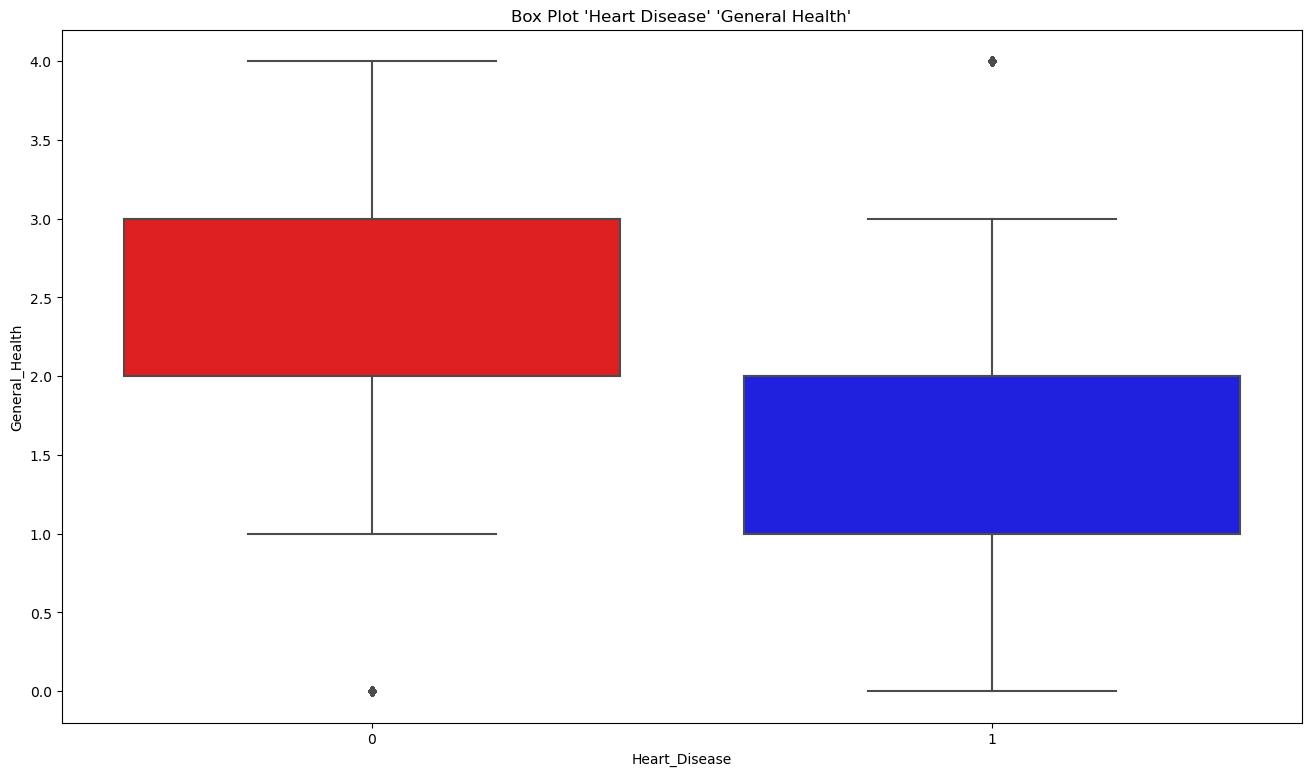

In [33]:
cores = ['#ff0000', '#0000ff'] 
plt.figure(figsize=(16,9))
sns.boxplot(x = df["Heart_Disease"], y = df['General_Health'], palette= cores)
plt.title("Box Plot 'Heart Disease' 'General Health'")

In [34]:
df.groupby(by = 'Heart_Disease').describe()['Checkup']

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
0,283883.0,0.402712,0.832800,0.0,0.0,0.0,0.0,4.0
1,24971.0,0.146770,0.522505,0.0,0.0,0.0,0.0,4.0


In [35]:
df[df['Heart_Disease'] == 1]['Checkup'].mean(), df[df['Heart_Disease'] == 0]['Checkup'].mean()


###pessoas com doenças no coração tendem a fazer check_up com maior frequência.

(0.1467702534940531, 0.40271168051626904)

In [36]:
df['Heart_Disease'].mean()

0.08085049894124732

Text(0.5, 1.0, "Bar Plot 'Heart Disease' 'Checkup'")

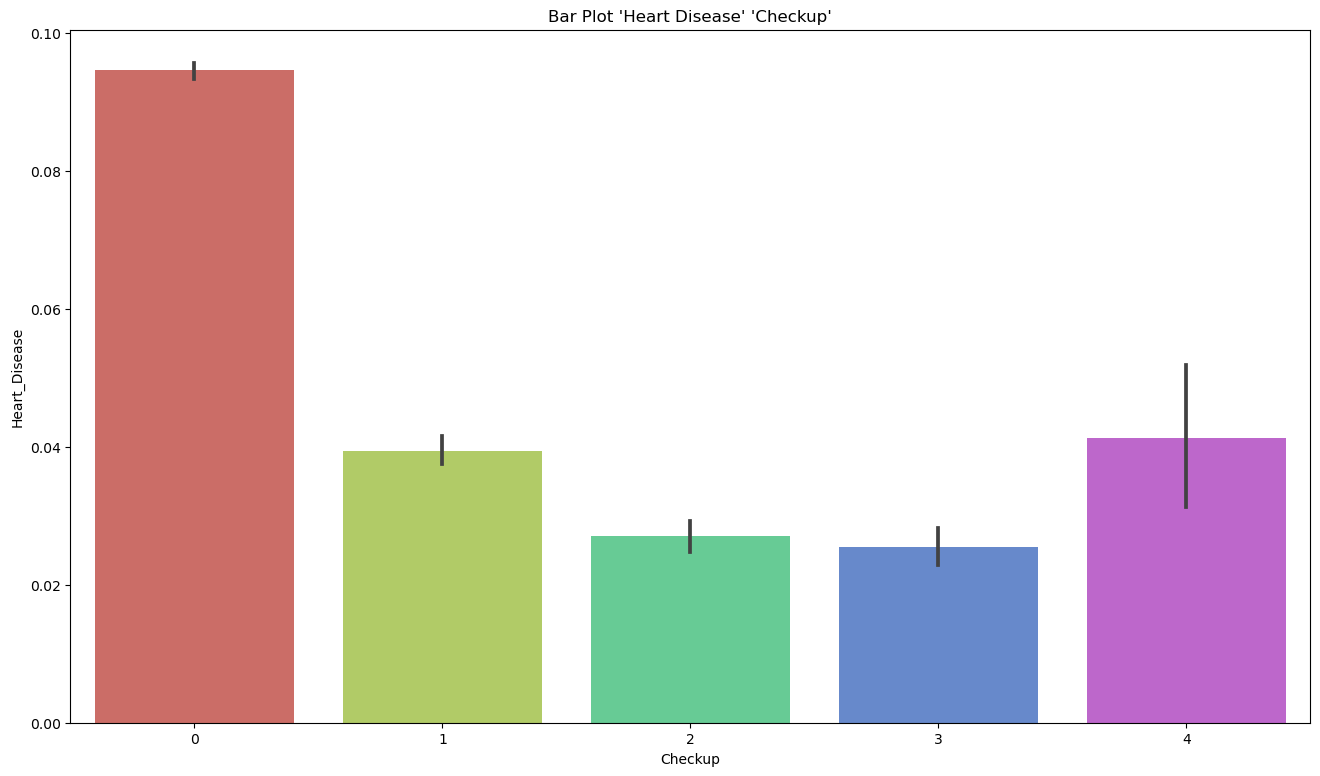

In [37]:
plt.figure(figsize=(16,9))
sns.barplot(x = df['Checkup'], y = df['Heart_Disease'], palette = 'hls')
plt.title("Bar Plot 'Heart Disease' 'Checkup'")
###pessoas com doenças no coração tendem a fazer check_up com maior frequência.

Text(0.5, 1.0, "Bar Plot 'Checkup' 'Heart_Disease'")

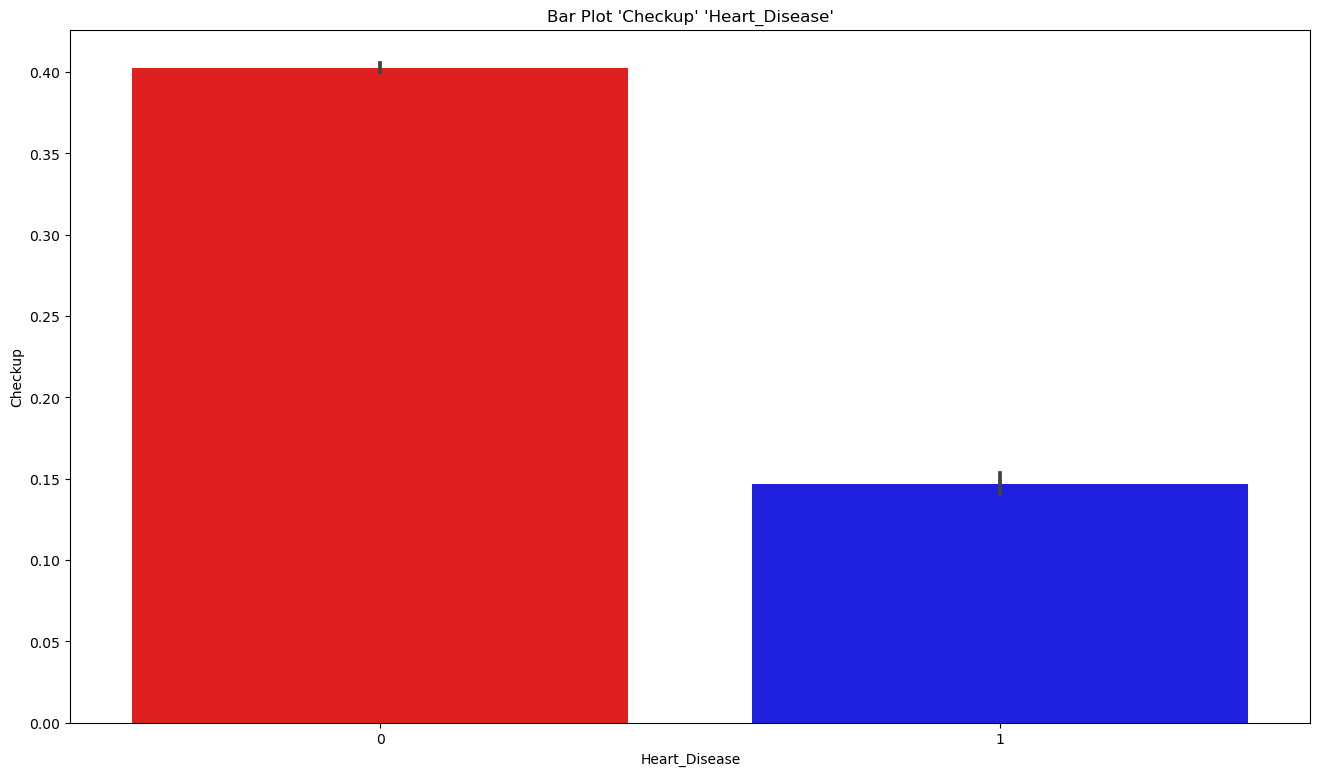

In [38]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Checkup'], x = df['Heart_Disease'], palette = cores)##maior frequencia pessoas com problema no coração**
plt.title("Bar Plot 'Checkup' 'Heart_Disease'")

In [39]:
df[df['Exercise'] == 1]['Heart_Disease'].mean(), df[df['Exercise'] == 0]['Heart_Disease'].mean() ##pessoas que fazem exercicio
##tem metade da chance de doenças no coração
df[df['Exercise'] == 1]['Heart_Disease'].mean()/ df[df['Exercise'] == 0]['Heart_Disease'].mean()

#0.5146526521569734 de chance a menos**

0.5146526521569734

Text(0.5, 1.0, "Bar Plot 'Checkup' 'Exercise'")

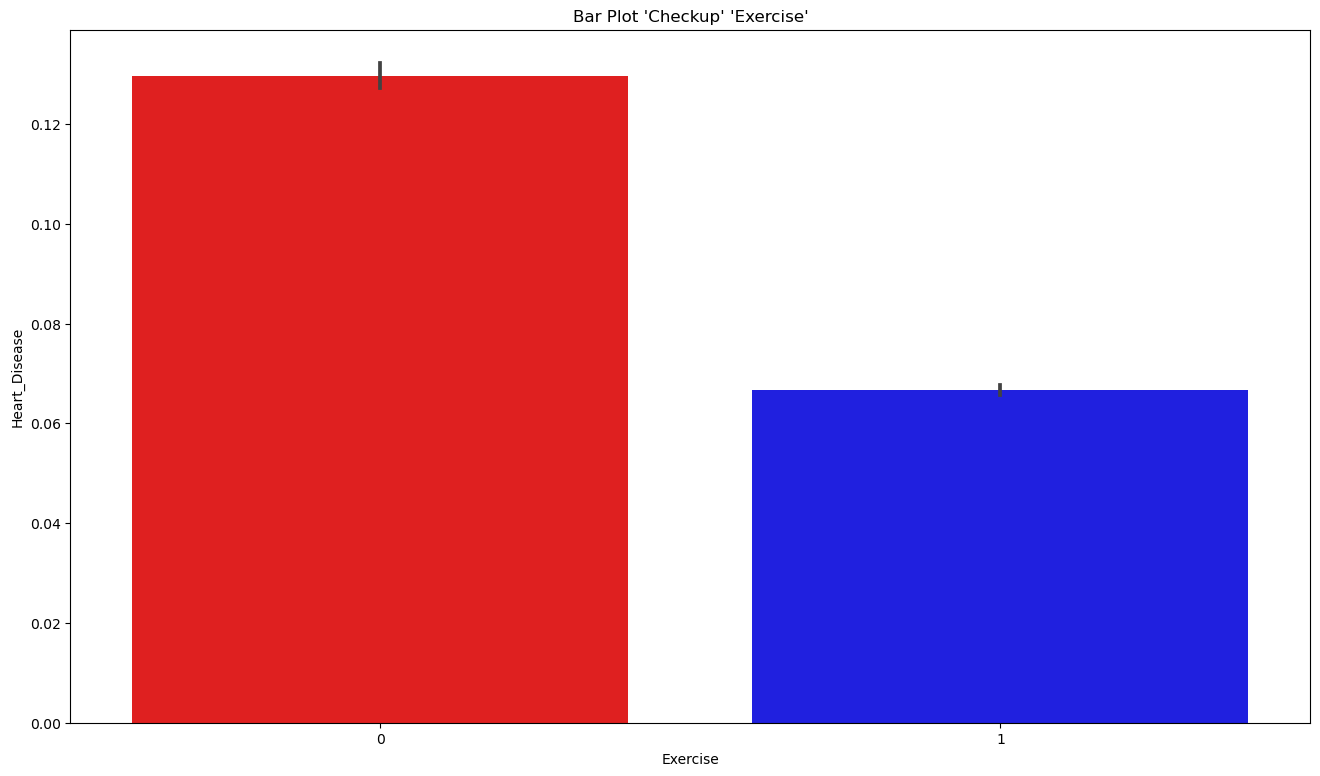

In [40]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Exercise'], palette = cores)
plt.title("Bar Plot 'Checkup' 'Exercise'")

In [41]:
df.groupby(by = 'Exercise' ).describe()['Heart_Disease']

,count,mean,std,min,25%,50%,75%,max
Exercise,,,,,,,,
0,69473.0,0.129604,0.335870,0.0,0.0,0.0,0.0,1.0
1,239381.0,0.066701,0.249504,0.0,0.0,0.0,0.0,1.0


In [42]:
df[df['Skin_Cancer'] == 1]['Heart_Disease'].mean(), df[df['Skin_Cancer'] == 0]['Heart_Disease'].mean() ##
##skin cancer has ~ 2.14 times more chance to has heart_disease
df[df['Skin_Cancer'] == 1]['Heart_Disease'].mean()/ df[df['Skin_Cancer'] == 0]['Heart_Disease'].mean()

2.1499844238525405

<Axes: xlabel='Skin_Cancer', ylabel='Heart_Disease'>

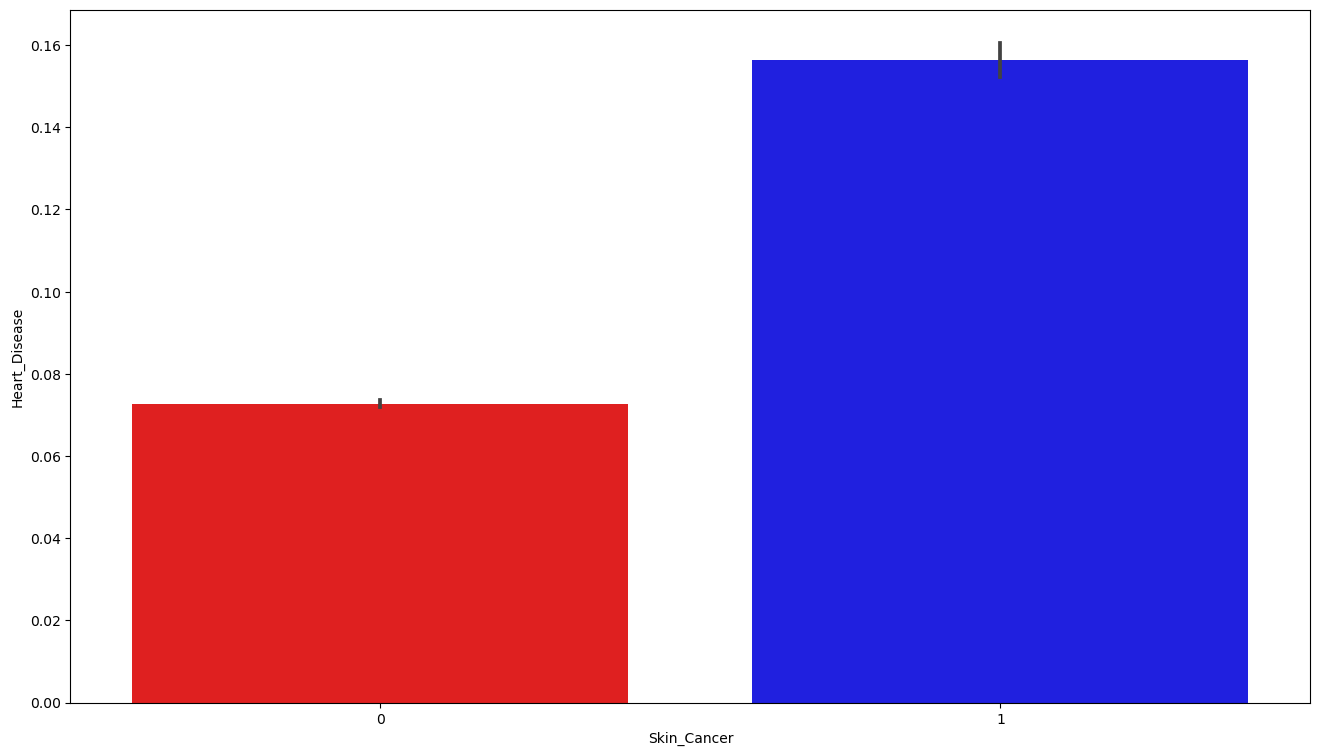

In [43]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Skin_Cancer'] , palette = cores)

In [44]:
df[df['Other_Cancer'] == 1]['Heart_Disease'].mean(), df[df['Other_Cancer'] == 0]['Heart_Disease'].mean() ##
##Other_Cancer  has ~ 2.17 times more chance to has heart_disease
df[df['Other_Cancer'] == 1]['Heart_Disease'].mean()/ df[df['Other_Cancer'] == 0]['Heart_Disease'].mean()

2.173418346774513

<Axes: xlabel='Other_Cancer', ylabel='Heart_Disease'>

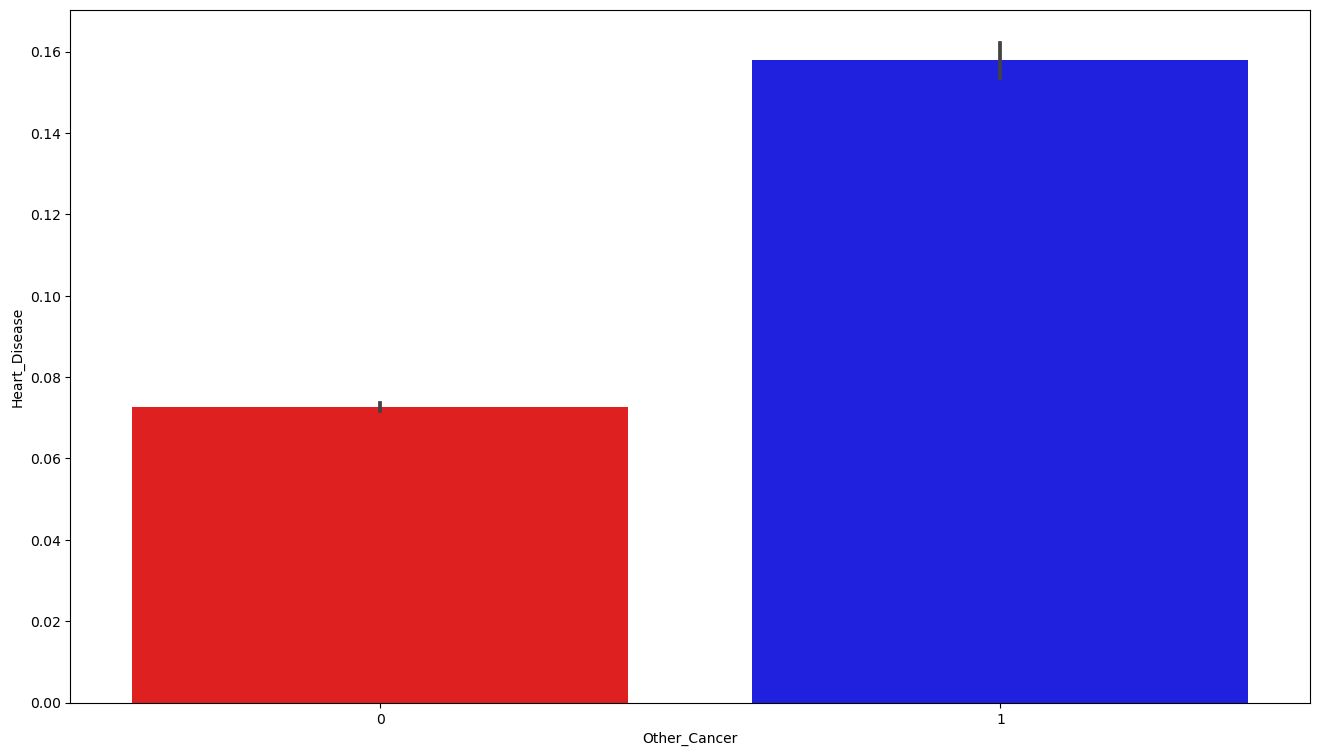

In [45]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Other_Cancer'], palette = cores)

In [46]:
df[df['Other_Cancer'] == 1]['Heart_Disease'].mean(), df[df['Other_Cancer'] == 0]['Heart_Disease'].mean() ##
##Other_Cancer  has ~ 2.17 times more chance to has heart_disease
df[df['Other_Cancer'] == 1]['Heart_Disease'].mean()/ df[df['Other_Cancer'] == 0]['Heart_Disease'].mean()

2.173418346774513

In [47]:
def ratioheartdisease(df,column):
    cores = ['#ff0000', '#0000ff'] 
    
    ratio = df[df[column] == 1]['Heart_Disease'].mean()/ df[df[column] == 0]['Heart_Disease'].mean()
    plt.figure(figsize=(16,9))
    sns.barplot(y = df['Heart_Disease'], x = df[column] , palette = cores)
    print(f'ratio heart disease ~ {round(ratio, 3)} if {column} is True')

ratio heart disease ~ 1.29 if Depression is True


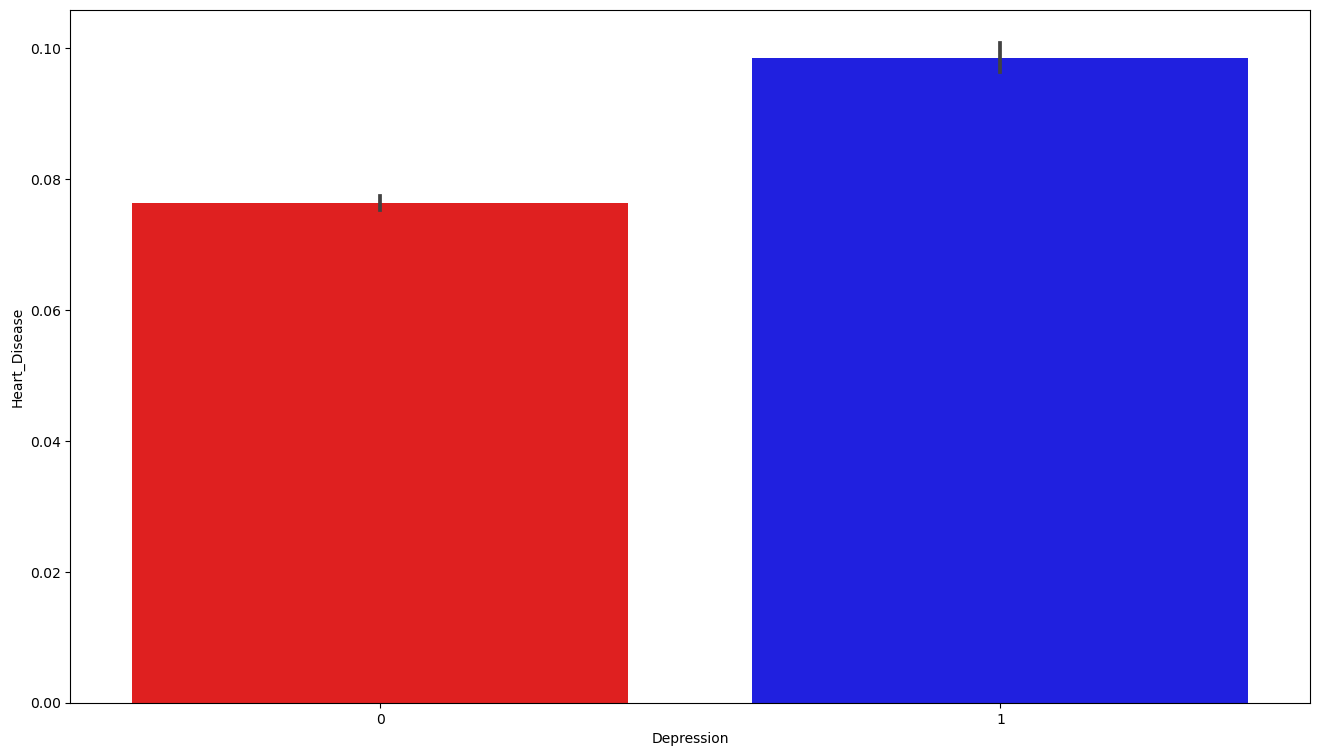

In [48]:
ratioheartdisease(df,column = 'Depression')

ratio heart disease ~ 2.733 if Arthritis is True


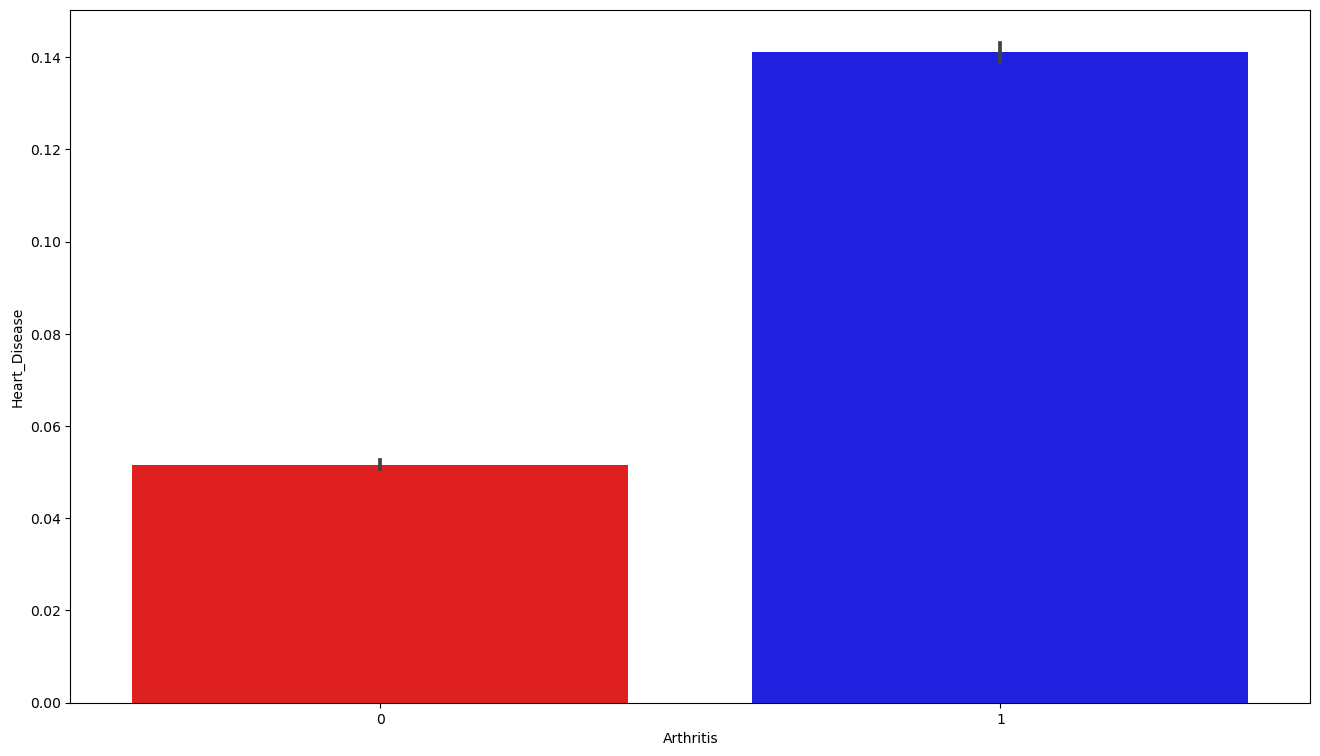

In [49]:
ratioheartdisease(df,column = 'Arthritis')

Text(0.5, 1.0, 'Bar plot Age_category e Heart Disease')

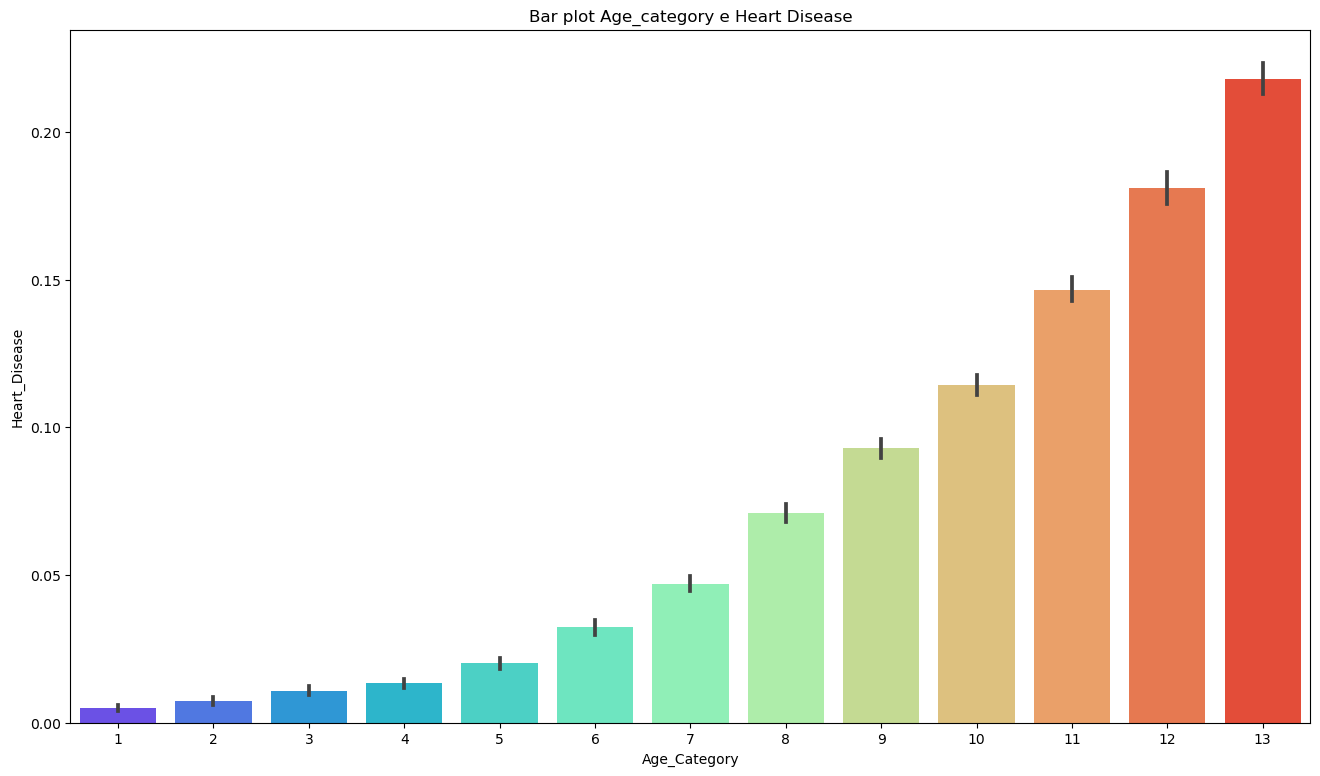

In [50]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category'], palette = 'rainbow')
plt.title("Bar plot Age_category e Heart Disease")##proporção Heart disease**

Text(0.5, 1.0, 'Bar plot Age_category e Heart Disease diferenciado por exercicio')

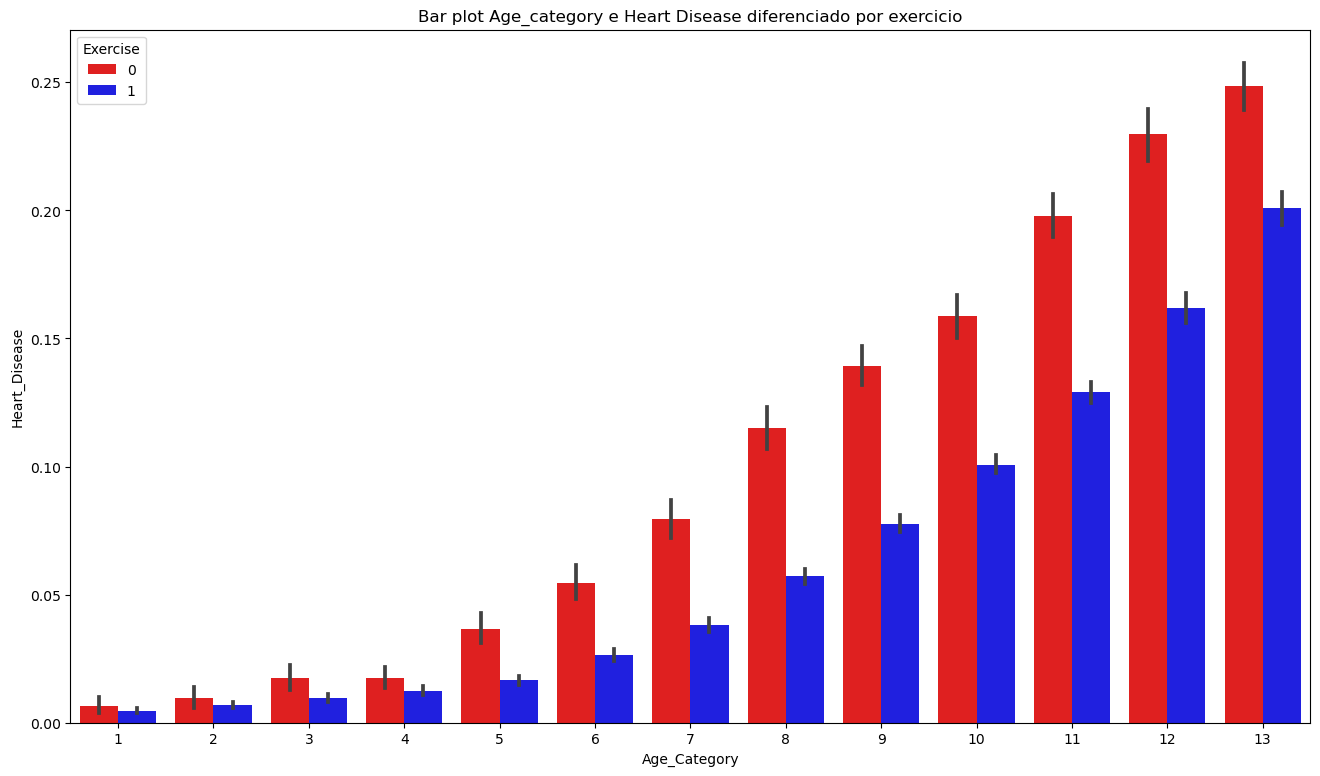

In [51]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category'], hue = df['Exercise'], palette = cores)
plt.title("Bar plot Age_category e Heart Disease diferenciado por exercicio")##proporção Heart disease**
##se fizer exercicio você consegue retardar doenças cardiacas***

In [52]:
df.groupby(by = 'Heart_Disease').describe()['Height_(cm)'] ##nao parece ter muita interferencia na altura

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
0,283883.0,170.565367,10.659193,91.0,163.0,170.0,178.0,241.0
1,24971.0,171.182332,10.628520,91.0,163.0,173.0,178.0,216.0


<Axes: xlabel='Heart_Disease', ylabel='Height_(cm)'>

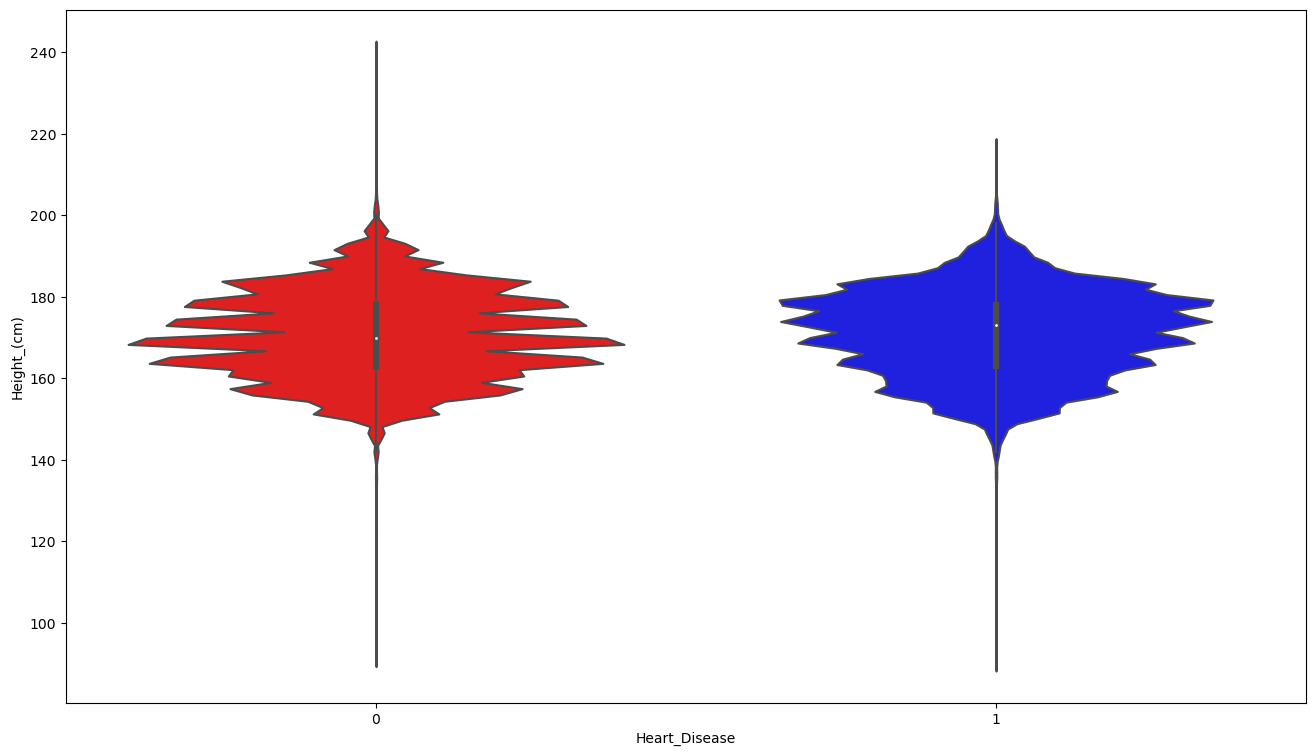

In [53]:
plt.figure(figsize=(16,9))
sns.violinplot(x = df['Heart_Disease'], y = df['Height_(cm)'] , palette = cores) 

In [54]:
df.groupby(by = 'Heart_Disease').describe()['Weight_(kg)']### a media de peso de pessoas com doenças no coração é maior**

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
0,283883.0,83.298262,21.298574,24.95,68.04,81.19,95.25,293.02
1,24971.0,86.889986,21.571551,30.00,72.57,83.91,99.79,283.50


<Axes: xlabel='Heart_Disease', ylabel='Weight_(kg)'>

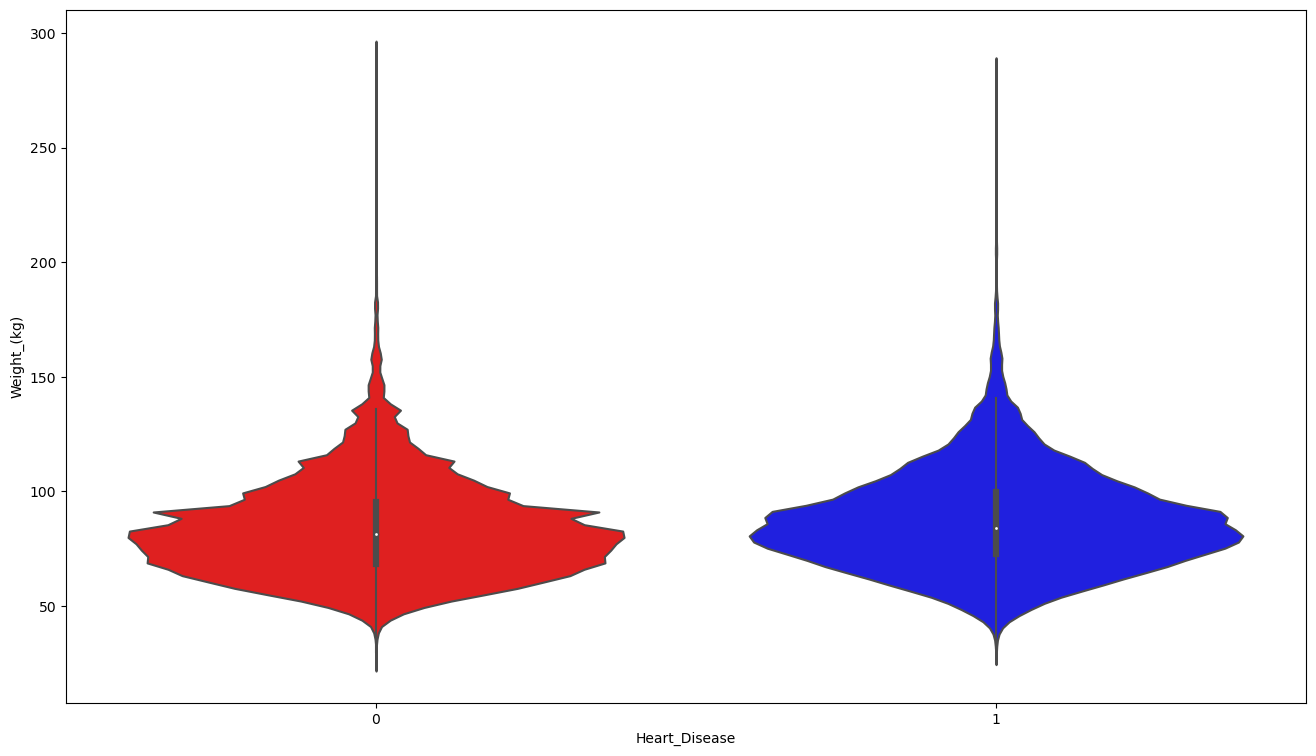

In [55]:

plt.figure(figsize=(16,9))
sns.violinplot(x = df['Heart_Disease'], y = df['Weight_(kg)'],  palette = cores)

In [56]:
df.groupby(by = 'Heart_Disease').describe()['BMI']  #media de BMI de pessoas com doenças no coração é maior**

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
0,283883.0,28.543676,6.511201,12.02,24.14,27.44,31.66,99.33
1,24971.0,29.564505,6.575148,12.11,25.09,28.55,32.89,88.57


<Axes: xlabel='Heart_Disease', ylabel='BMI'>

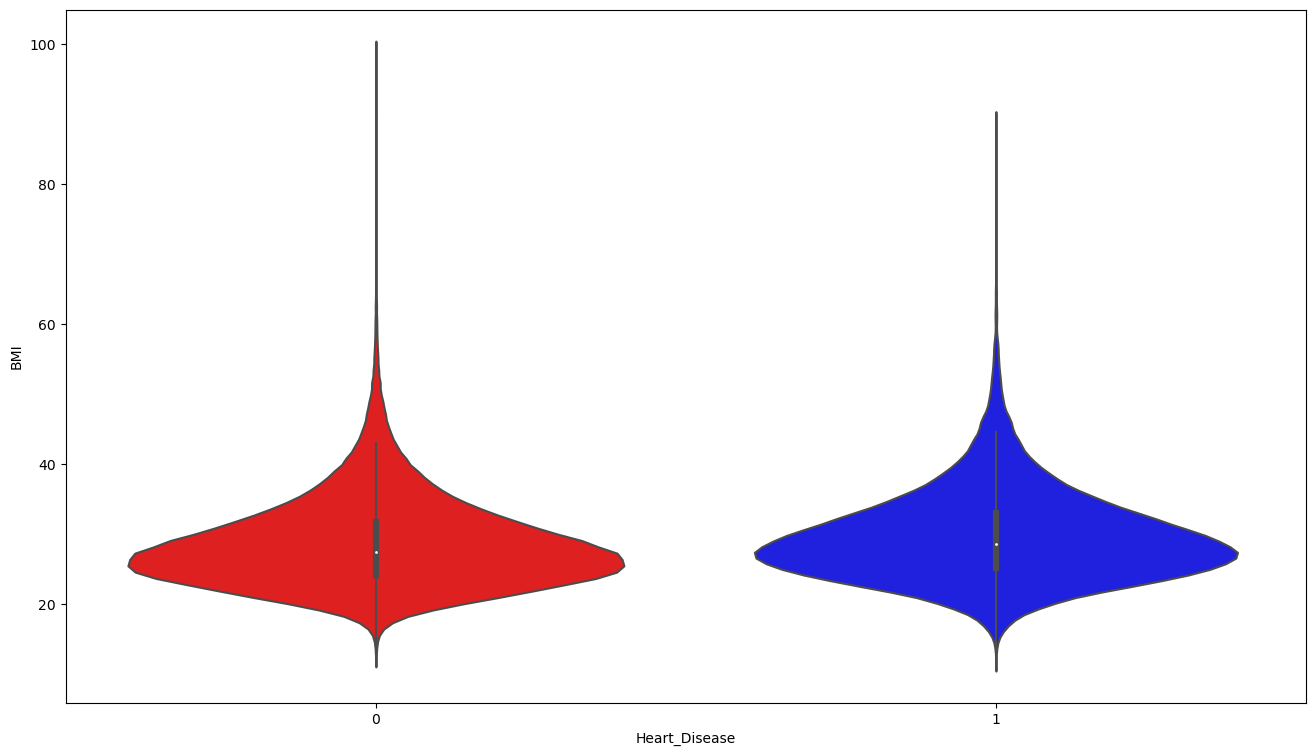

In [57]:
plt.figure(figsize=(16,9))
sns.violinplot(x = df['Heart_Disease'], y = df['BMI'] , color = 'red', palette = cores)

ratio heart disease ~ 2.058 if Smoking_History is True


<Figure size 1600x900 with 0 Axes>

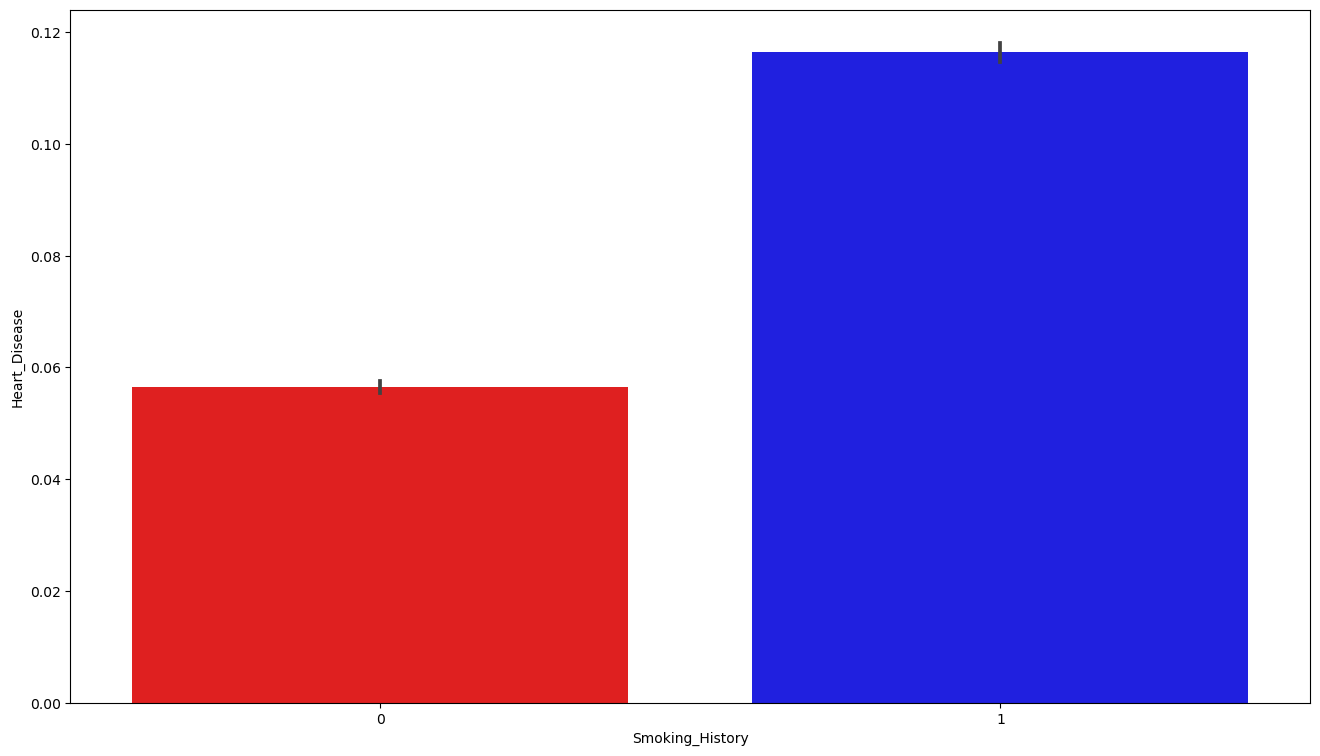

In [58]:
plt.figure(figsize=(16,9))
ratioheartdisease(df, 'Smoking_History')

In [59]:
df.groupby(by = 'Heart_Disease').describe()['Alcohol_Consumption'] 

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
0,283883.0,5.185298,8.198700,0.0,0.0,1.0,7.0,30.0
1,24971.0,4.085339,8.143996,0.0,0.0,0.0,4.0,30.0


<Axes: xlabel='Heart_Disease', ylabel='Alcohol_Consumption'>

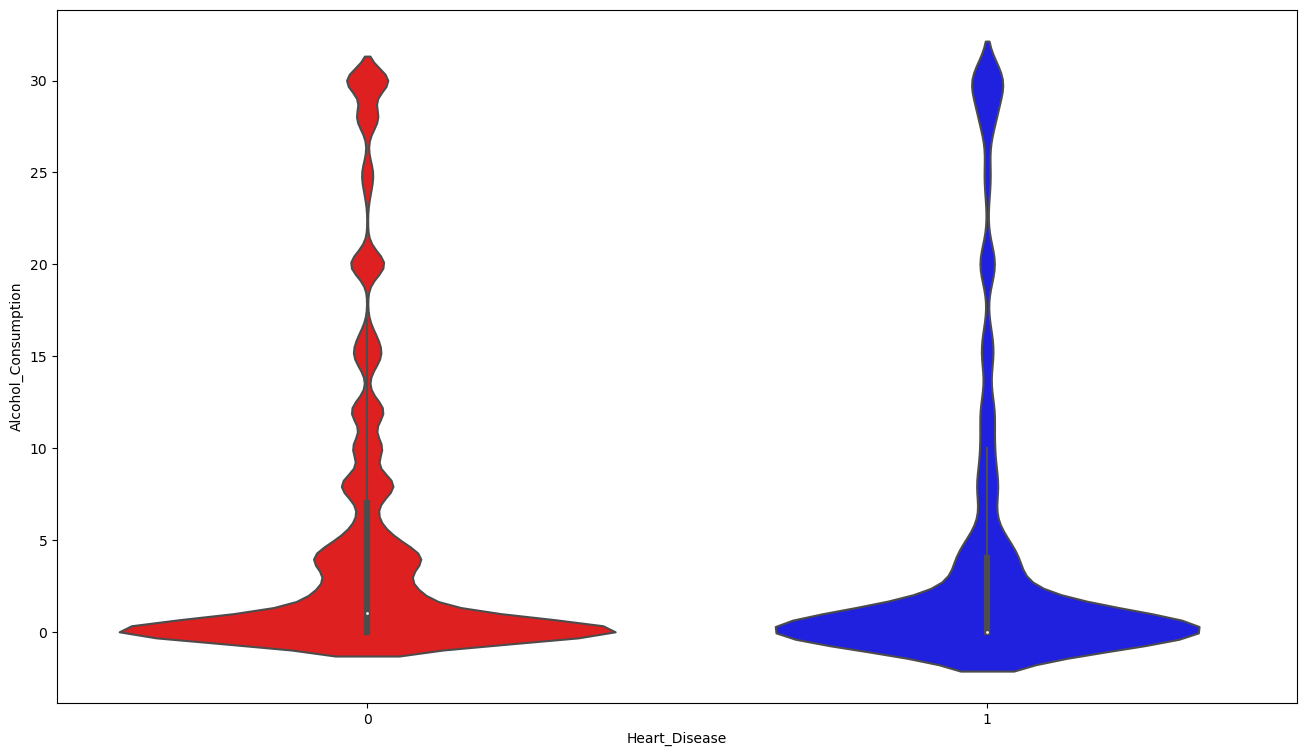

In [60]:
plt.figure(figsize=(16,9))
sns.violinplot(x = df['Heart_Disease'], y = df['Alcohol_Consumption'], palette = cores)###pessoas com doenças de coração estão bebendo menos

<Axes: xlabel='Heart_Disease', ylabel='Alcohol_Consumption'>

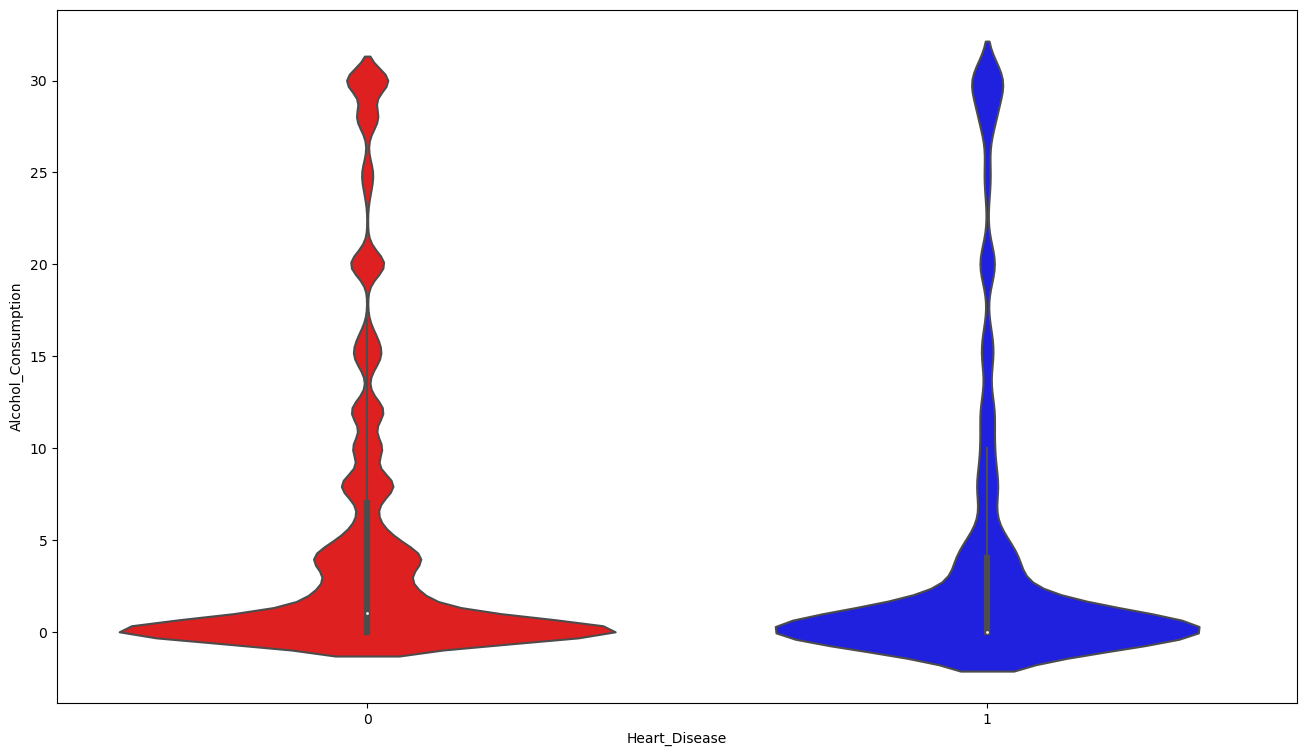

In [61]:
plt.figure(figsize=(16,9))
sns.violinplot(x = df['Heart_Disease'], y = df['Alcohol_Consumption'], palette = cores) ###pessoas com doenças de coração estão bebendo menos

<Axes: xlabel='Heart_Disease', ylabel='Fruit_Consumption'>

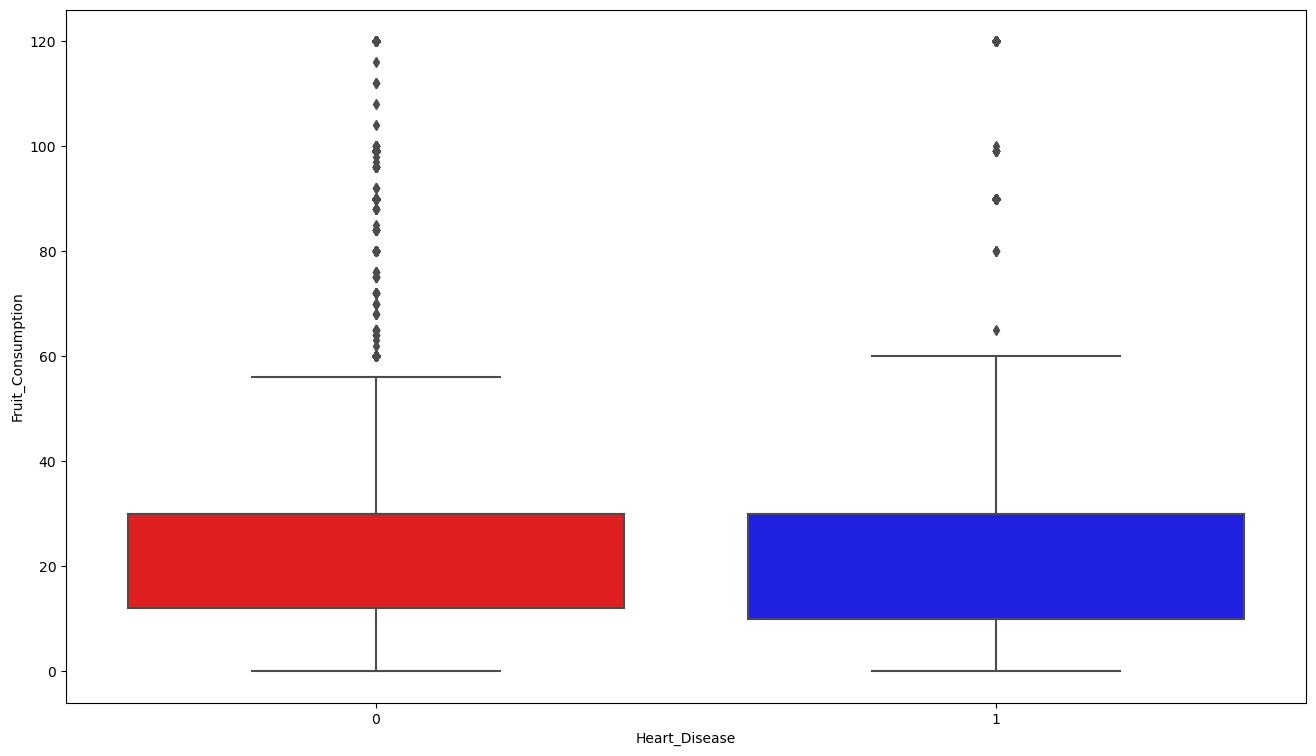

In [62]:
plt.figure(figsize=(16,9))
sns.boxplot(x = df['Heart_Disease'], y = df['Fruit_Consumption'], palette = cores) ## quem consome + fruta tem em média menos doença do coração

<Axes: xlabel='Age_Category', ylabel='Fruit_Consumption'>

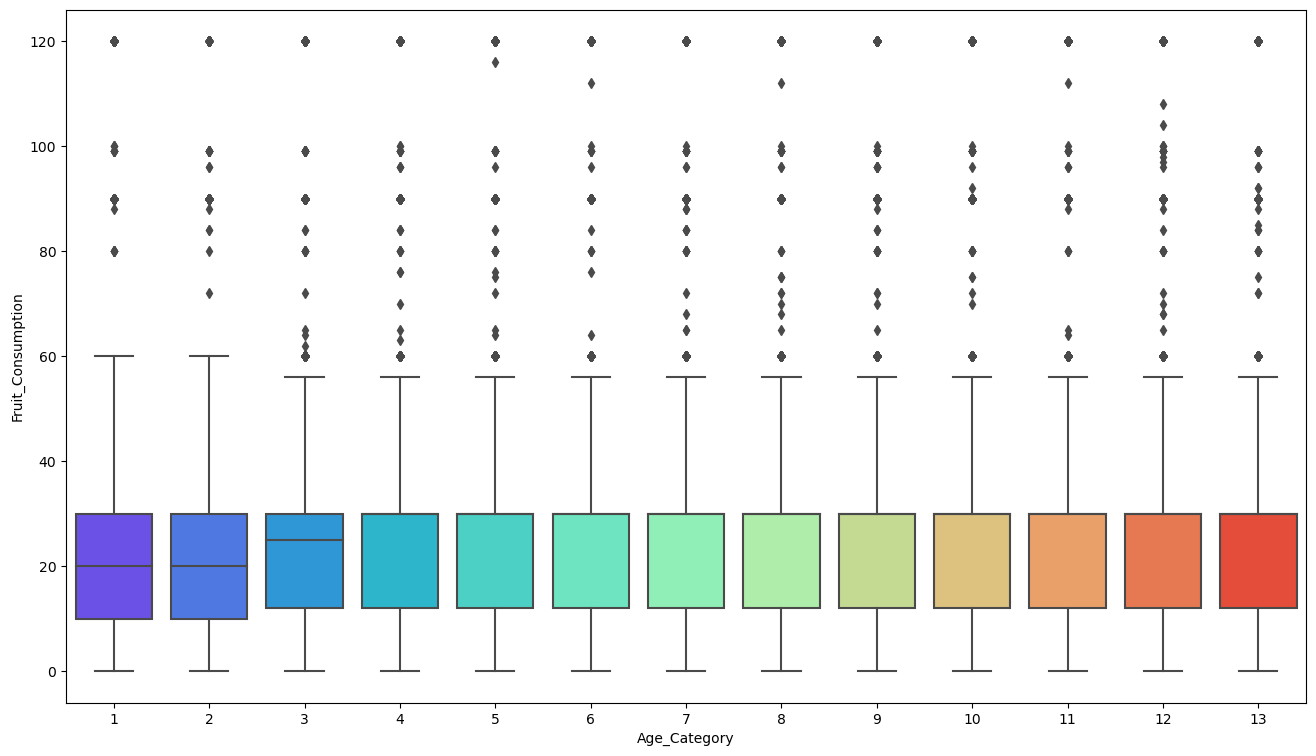

In [63]:
plt.figure(figsize=(16,9))
sns.boxplot(x = df['Age_Category'], y = df['Fruit_Consumption'], palette = 'rainbow')

<Axes: xlabel='Heart_Disease', ylabel='FriedPotato_Consumption'>

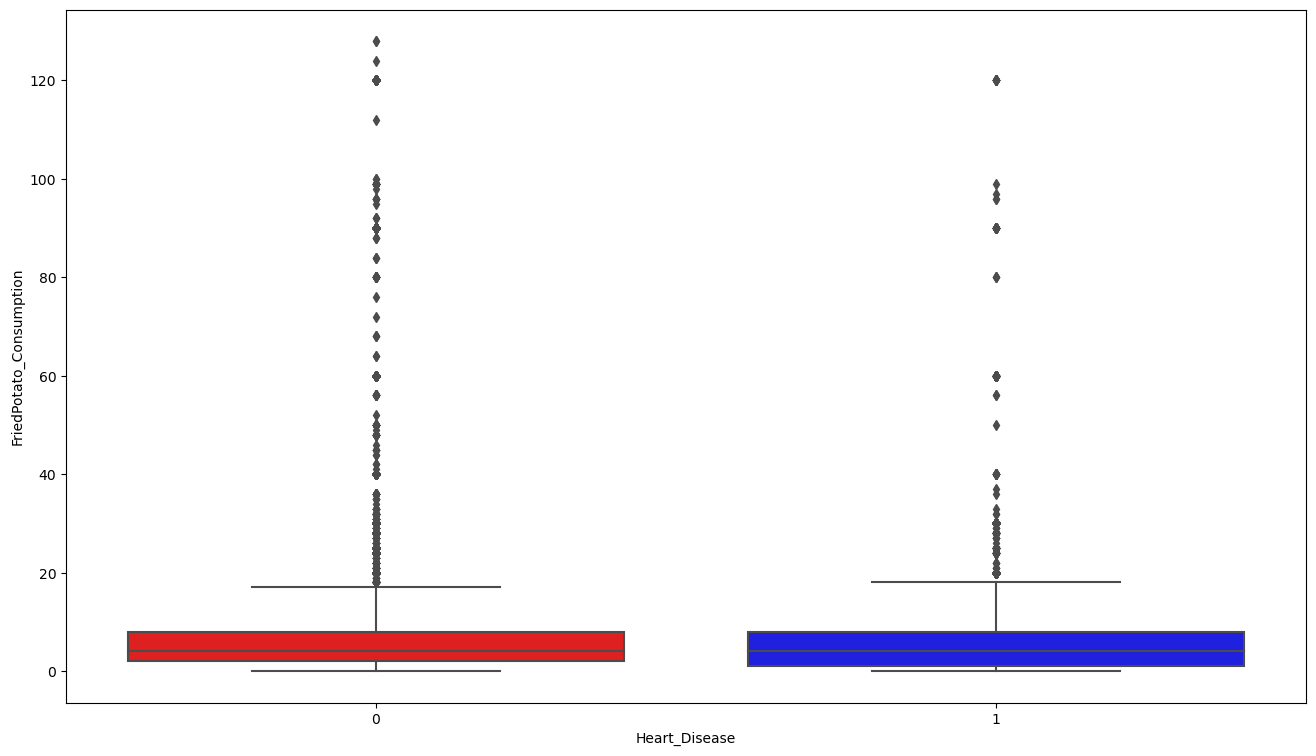

In [64]:
plt.figure(figsize=(16,9))
sns.boxplot(x = df['Heart_Disease'], y = df['FriedPotato_Consumption'], palette = cores) ## quem consome + Green_Vegetables_Consumption tem em média menos doença do coração

<Axes: xlabel='Heart_Disease', ylabel='FriedPotato_Consumption'>

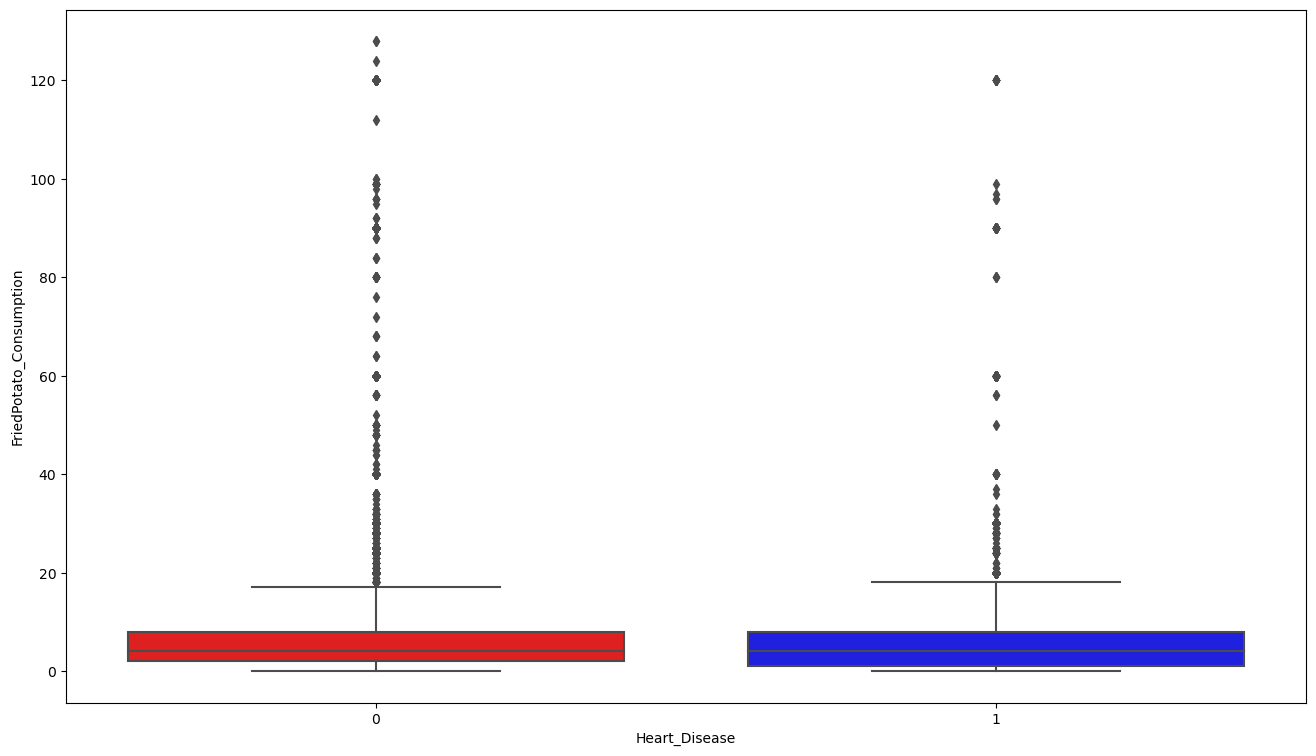

In [65]:
plt.figure(figsize=(16,9))
sns.boxplot(x = df['Heart_Disease'], y = df['FriedPotato_Consumption'], palette= cores)

In [66]:
df.groupby(by = 'Heart_Disease').describe()['IsMale'] 

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
0,283883.0,0.470564,0.499134,0.0,0.0,0.0,1.0,1.0
1,24971.0,0.603620,0.489155,0.0,0.0,1.0,1.0,1.0


ratio heart disease ~ 1.641 if IsMale is True


<Figure size 1600x900 with 0 Axes>

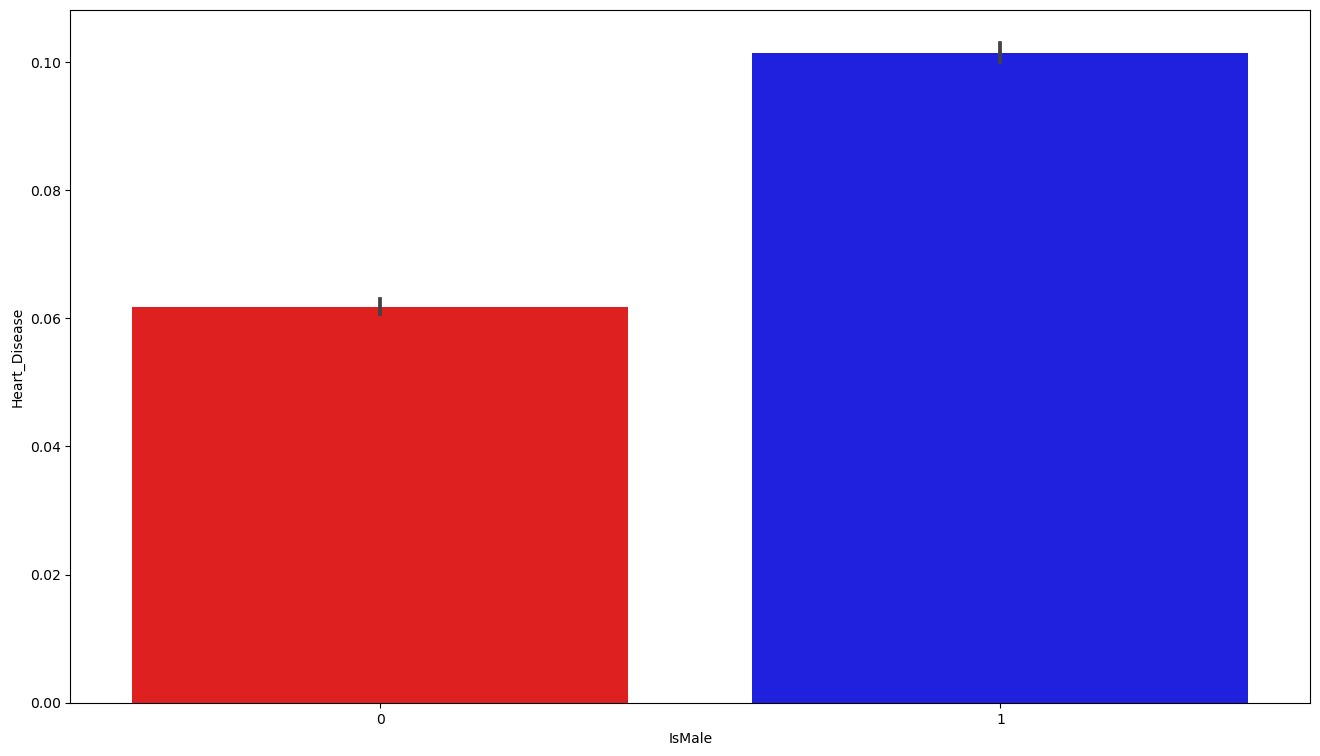

In [67]:
plt.figure(figsize=(16,9))
ratioheartdisease(df, 'IsMale') ##homens tem 1.64 mais chance de ter doenças no coração

Text(0.5, 1.0, 'Bar plot Age_category e Heart Disease diferenciado por IsMale')

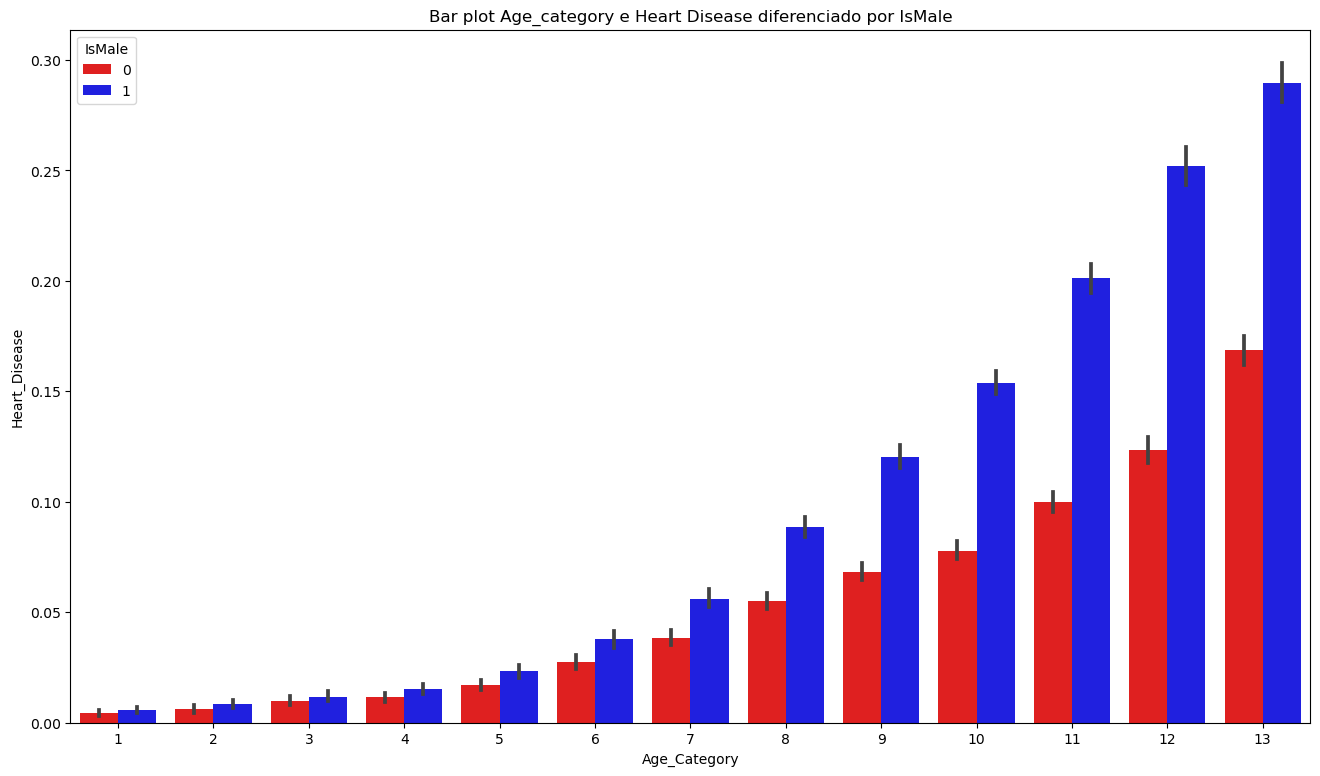

In [68]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category'], hue = df['IsMale'], palette = cores)
plt.title("Bar plot Age_category e Heart Disease diferenciado por IsMale")##proporção Heart disease**
##se fizer exercicio você consegue retardar doenças cardiacas***

Text(0.5, 1.0, 'Bar plot Age_category e Heart Disease diferenciado por Smoking_history')

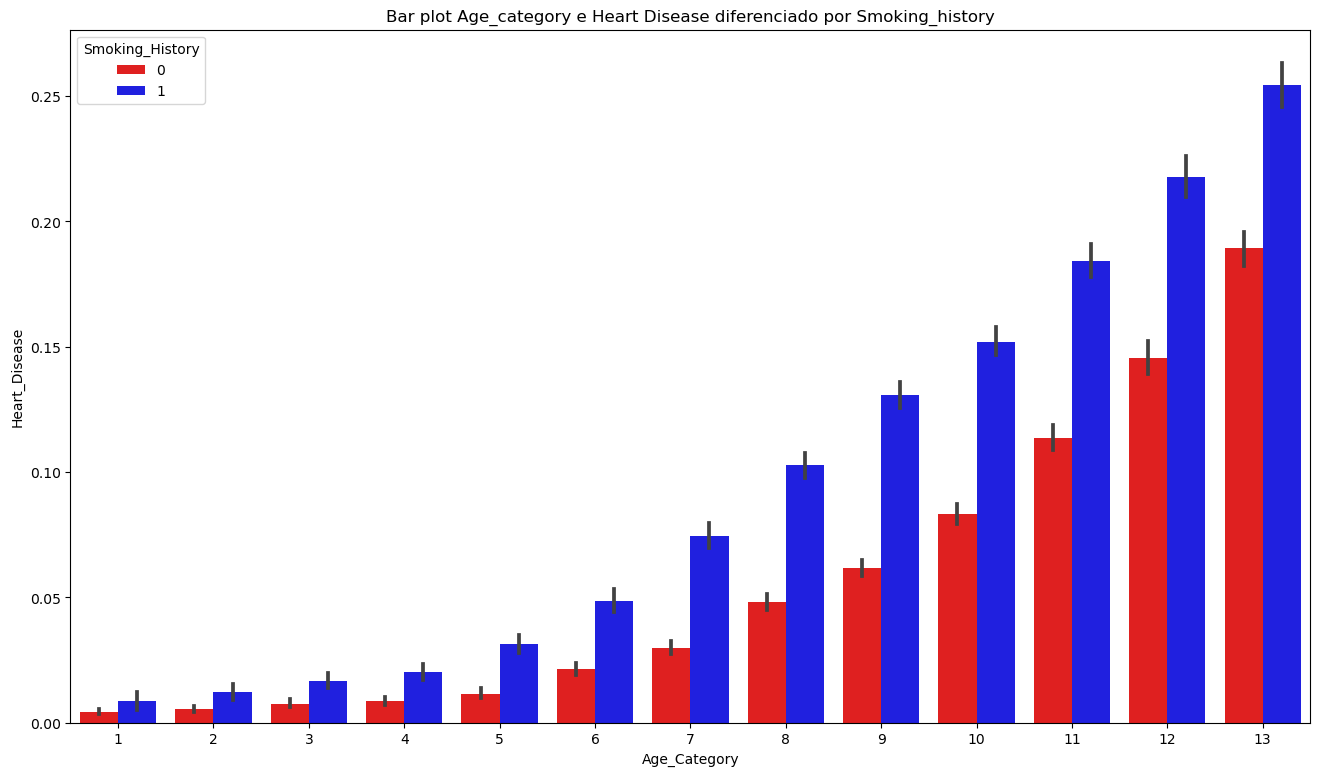

In [69]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category'], hue = df['Smoking_History'], palette = cores)
plt.title("Bar plot Age_category e Heart Disease diferenciado por Smoking_history")##proporção Heart disease**
##se fizer exercicio você consegue retardar doenças cardiacas***

Text(0.5, 1.0, 'Bar plot Age_category e Heart Disease diferenciado por Diabetes')

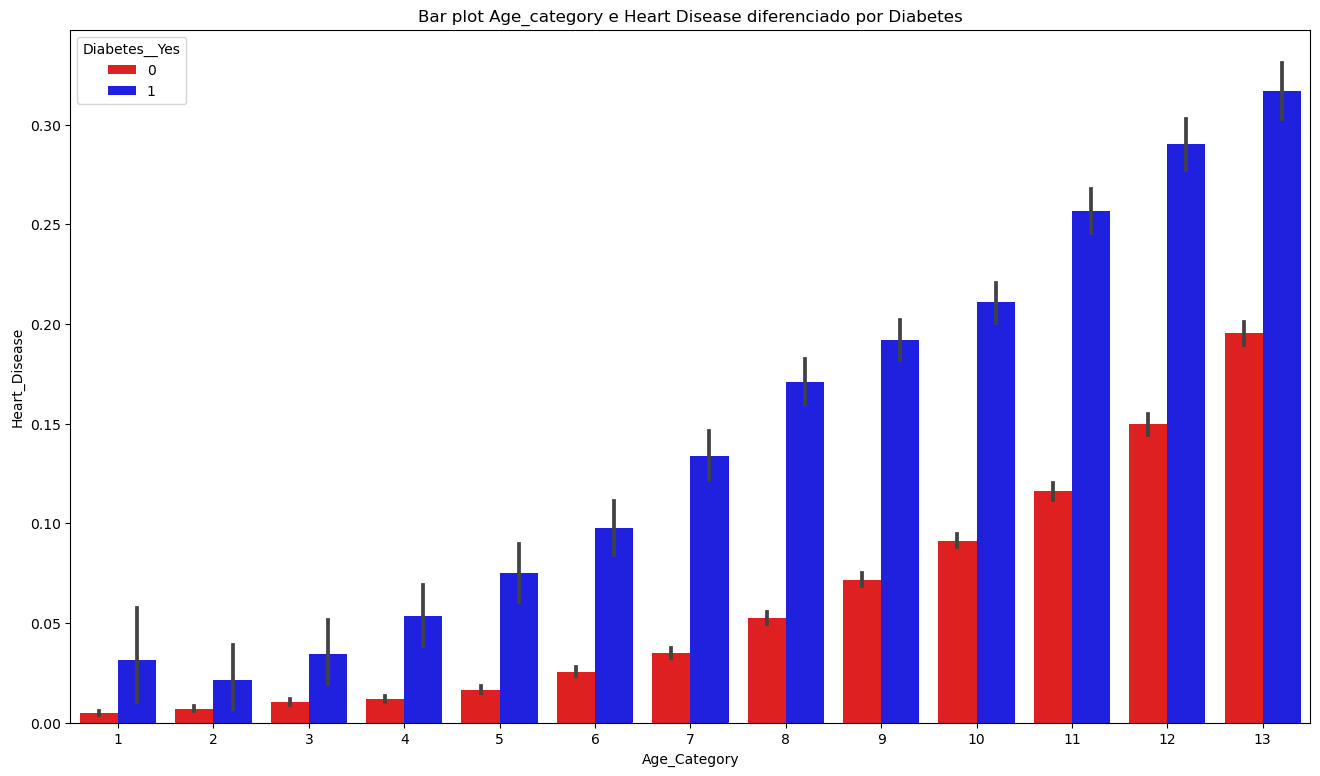

In [70]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category'], hue = df['Diabetes__Yes'], palette = cores)
plt.title("Bar plot Age_category e Heart Disease diferenciado por Diabetes")##proporção Heart disease**
##se fizer exercicio você consegue retardar doenças cardiacas***

<Axes: xlabel='Smoking_History', ylabel='IsMale'>

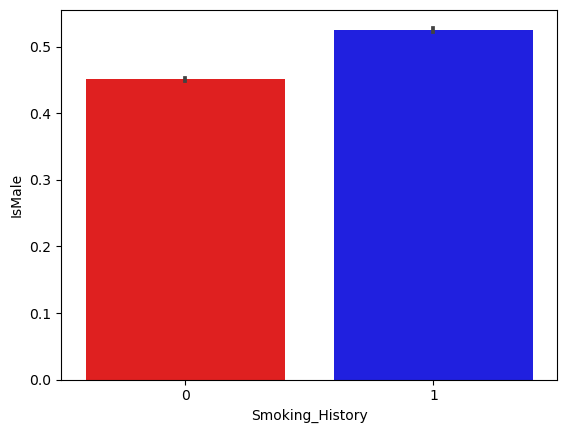

In [71]:
sns.barplot(y = df['IsMale'], x = df['Smoking_History'], palette = cores)

<Axes: xlabel='Diabetes__Yes', ylabel='IsMale'>

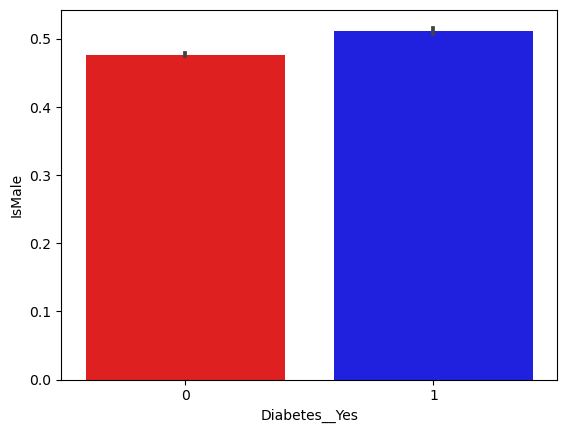

In [72]:
sns.barplot(y = df['IsMale'], x = df['Diabetes__Yes'], palette = cores)

Text(0.5, 1.0, 'Bar plot Age_category e Heart Disease diferenciado por Arthritis')

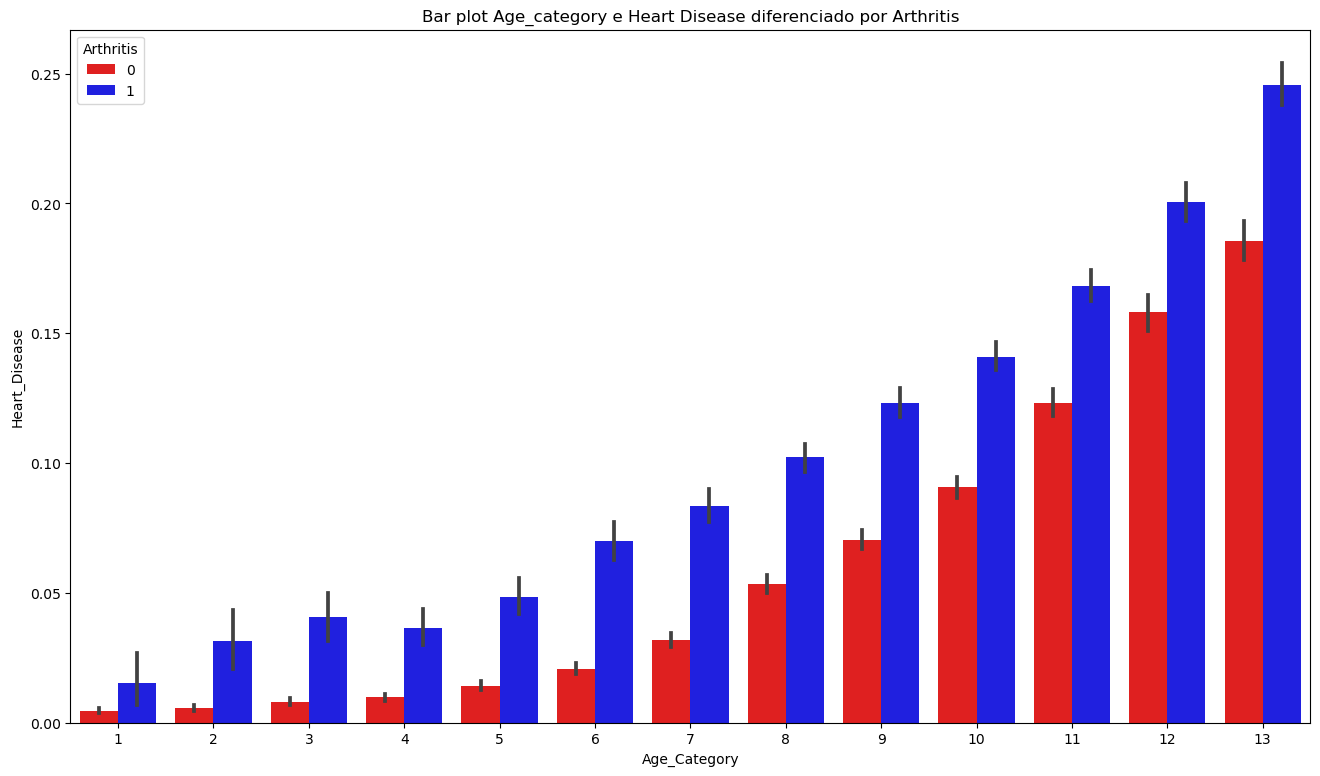

In [73]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category'], hue = df['Arthritis'], palette = cores)
plt.title("Bar plot Age_category e Heart Disease diferenciado por Arthritis")##proporção Heart disease**
##se fizer exercicio você consegue retardar doenças cardiacas***

Text(0.5, 1.0, 'Bar plot Age_category e Heart Disease diferenciado por Depression')

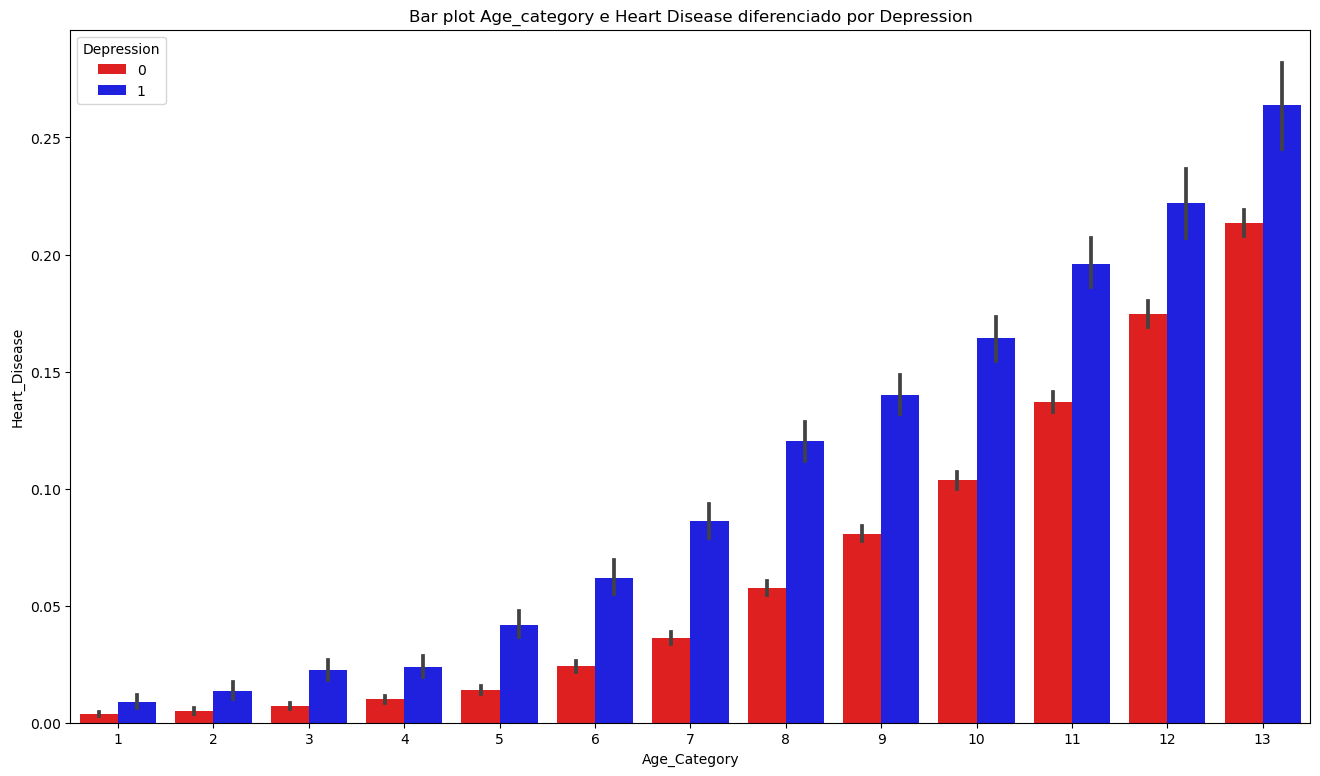

In [74]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category'], hue = df['Depression'], palette = cores)
plt.title("Bar plot Age_category e Heart Disease diferenciado por Depression")##proporção Heart disease**

In [75]:
df.groupby(by = 'Heart_Disease').describe()['IsMale']  ##men has more probability of have heart_disease

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
0,283883.0,0.470564,0.499134,0.0,0.0,0.0,1.0,1.0
1,24971.0,0.603620,0.489155,0.0,0.0,1.0,1.0,1.0


ratio heart disease ~ 3.376 if Diabetes__Yes is True


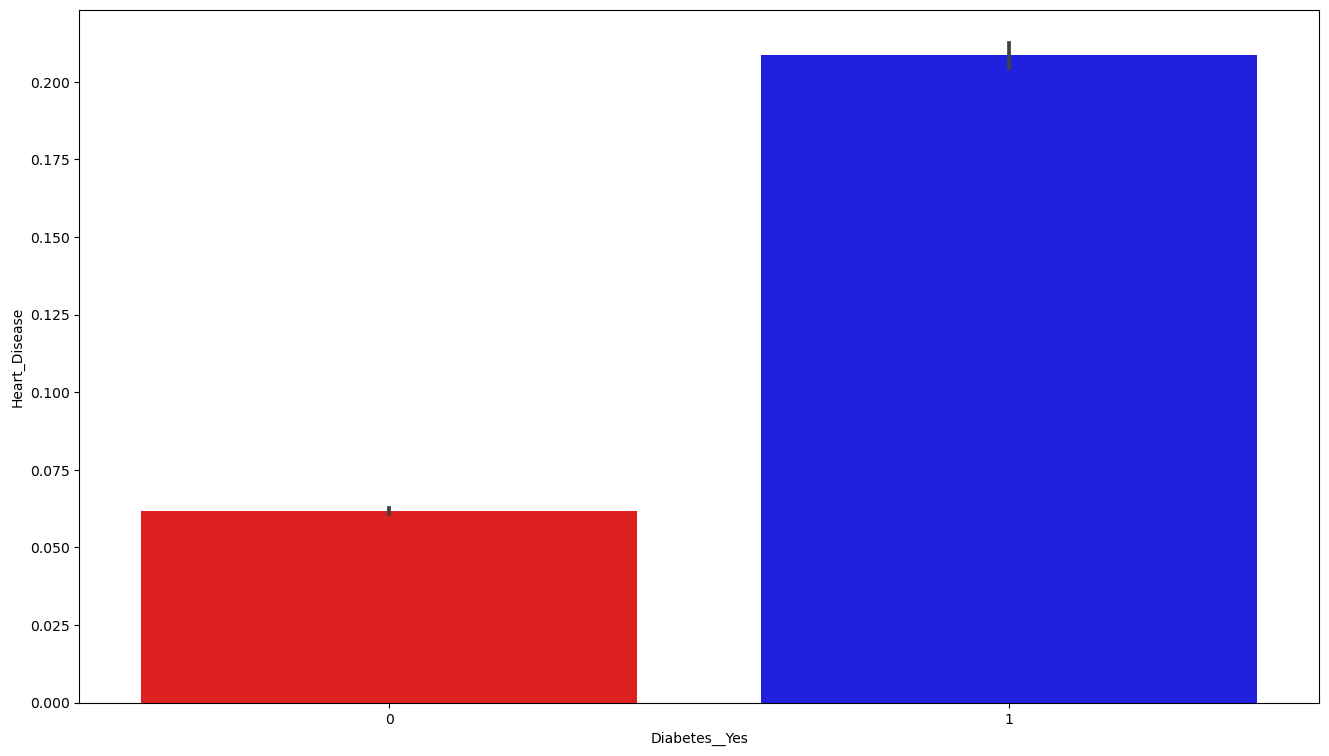

In [76]:
ratioheartdisease(df, column = 'Diabetes__Yes') ##diabetes aumenta em 3.3x a chance de doenças no coração**

ratio heart disease ~ 0.325 if Diabetes__No is True


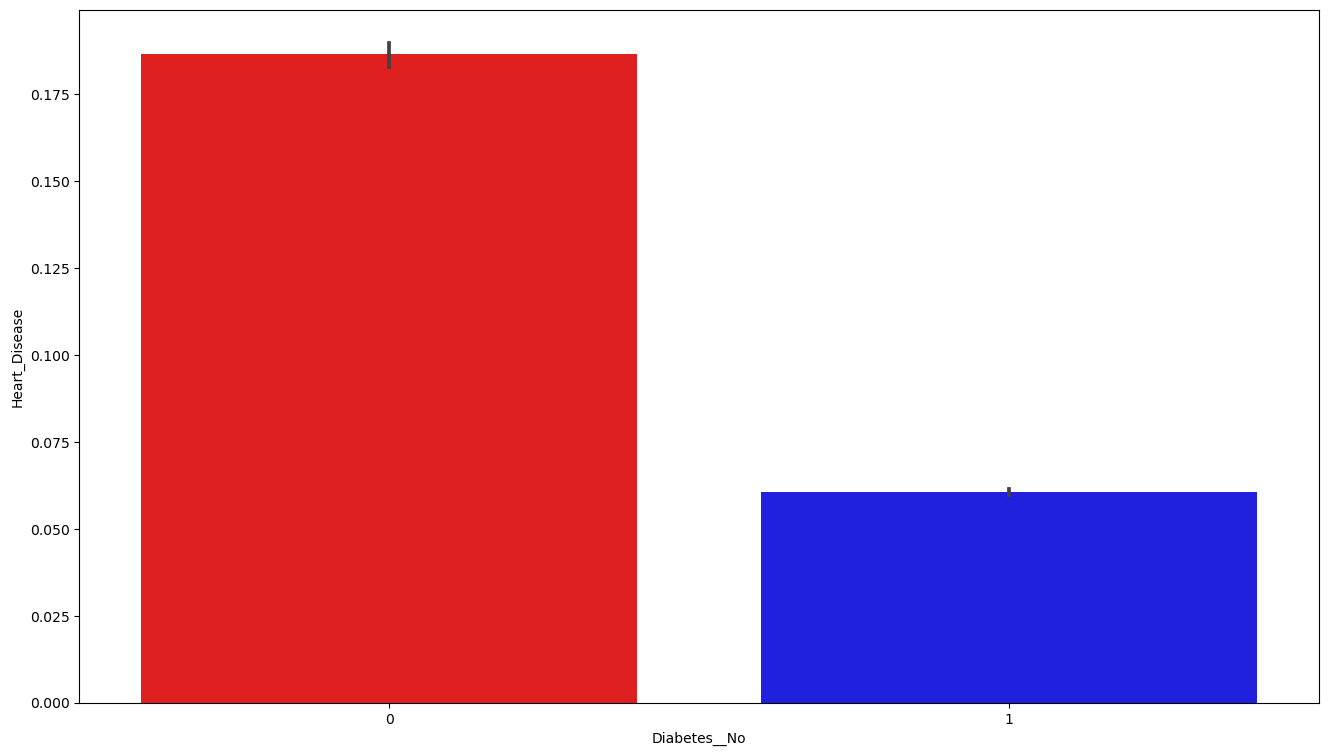

In [77]:
ratioheartdisease(df, column = 'Diabetes__No') 

ratio heart disease ~ 1.438 if Diabetes__No, pre-diabetes or borderline diabetes is True


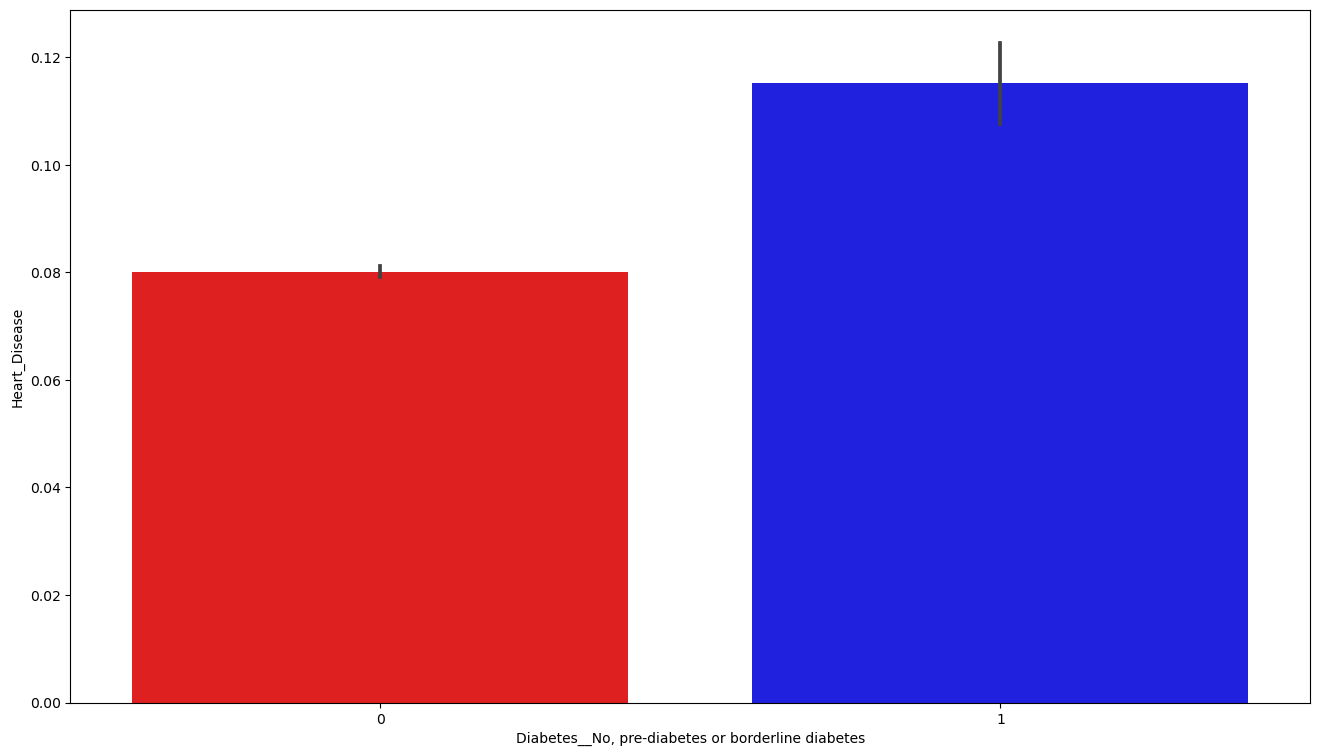

In [78]:
ratioheartdisease(df, column = 'Diabetes__No, pre-diabetes or borderline diabetes') ##pre diabetes aumenta em 1.43x

In [79]:
df['Heart_Disease'].mean()

0.08085049894124732

<Axes: xlabel='Age_Category', ylabel='Diabetes__Yes'>

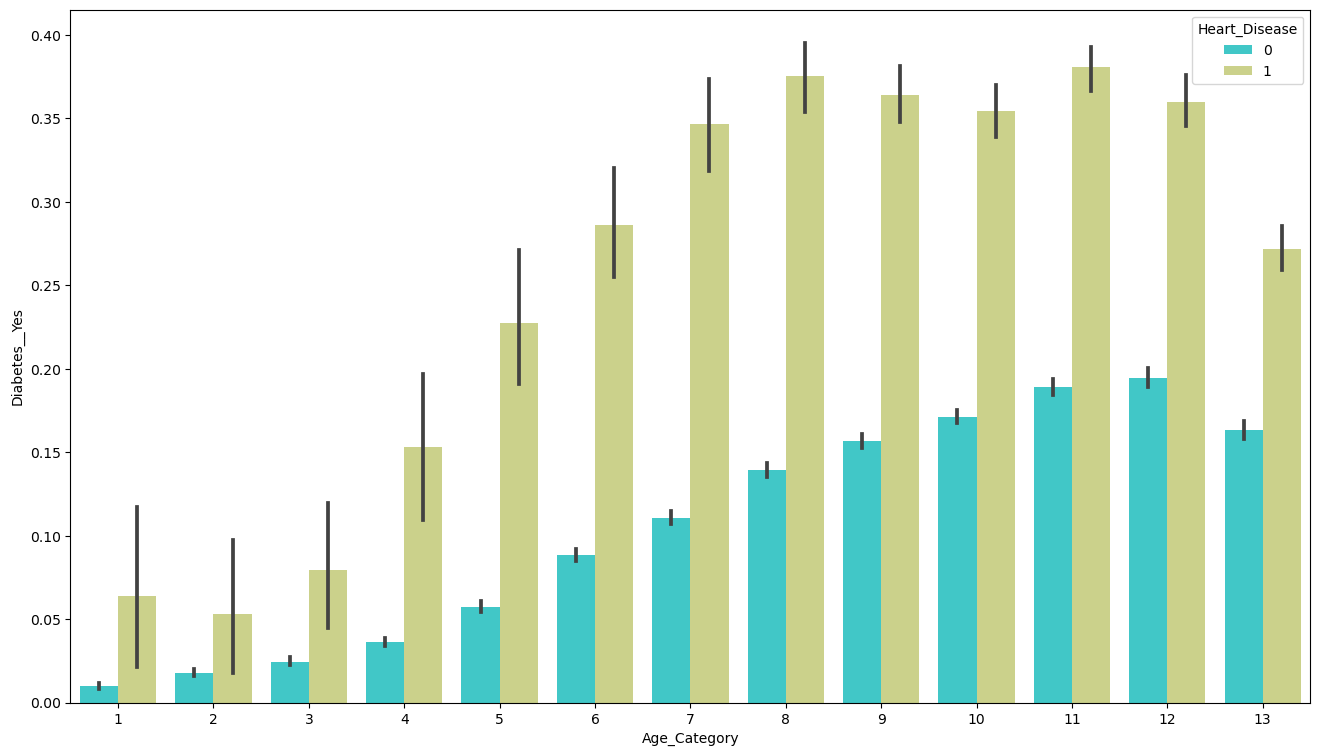

In [80]:
plt.figure(figsize=(16,9))
sns.barplot(y = df['Diabetes__Yes'], x = df['Age_Category'], hue = df['Heart_Disease'], palette = 'rainbow')###pessoas com diabetes tem alta chance
#de ter problemas no coração*** quando depois do 55 anos chega a quase 35% de chance

In [81]:
df.groupby(by = ['Heart_Disease', 'Age_Category']).describe()['Diabetes__Yes']['mean']

Heart_Disease  Age_Category
0              1               0.009953
               2               0.017944
               3               0.024689
               4               0.036347
               5               0.057609
               6               0.088467
               7               0.110804
               8               0.139163
               9               0.156907
               10              0.171288
               11              0.189285
               12              0.194715
               13              0.163250
1              1               0.063830
               2               0.053097
               3               0.079602
               4               0.153285
               5               0.227586
               6               0.286136
               7               0.346317
               8               0.375188
               9               0.364210
               10              0.354434
               11              0.380618
            

### Machine Learning

In [82]:
y = df['Heart_Disease']
X = df.drop(columns='Heart_Disease')
##dividir os dados em 2 
##dividir os dados maior

aux = df[df['Heart_Disease'] == 0]

print(f'razao saúdavel e doentes {len(aux)/y.sum()}')

razao saúdavel e doentes 11.36850746866365


In [83]:
from sklearn.model_selection import train_test_split
X_trainU, X_testU, y_trainU, y_testU = train_test_split(X, y, test_size=0.1, random_state=50)##dados desbalanceados

# Balanceando os DADOS

In [84]:
from imblearn.under_sampling import RandomUnderSampler##undersampling dos dados
rus = RandomUnderSampler(random_state=0)
X, y = rus.fit_resample(X_trainU, y_trainU)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)##dados balanceados.

# USANDO XGBCCLASSIFIER

In [86]:
from xgboost import XGBClassifier

In [87]:
XGBC = XGBClassifier(objective='binary:logistic')

In [88]:
XGBC.fit(X = X_train,y =  y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
y_pred = XGBC.predict(X = X_test)

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7598844957796534
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      2240
           1       0.74      0.80      0.77      2262

    accuracy                           0.76      4502
   macro avg       0.76      0.76      0.76      4502
weighted avg       0.76      0.76      0.76      4502

[[1604  636]
 [ 445 1817]]


In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

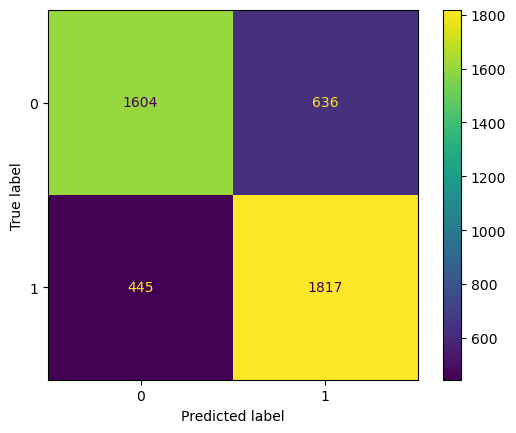

In [92]:
cm = confusion_matrix(y_test, y_pred, labels=XGBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBC.classes_)
disp.plot()

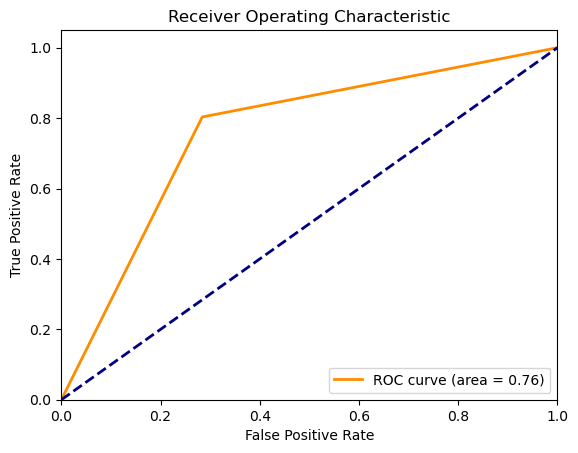

In [93]:
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Usando CATBOOST

In [94]:
from catboost import Pool,CatBoostClassifier

In [95]:
CB = CatBoostClassifier()
CB.fit(X_train, y_train, verbose = False)

y_pred = CB.predict(X_test)


In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.76499333629498
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      2240
           1       0.74      0.81      0.78      2262

    accuracy                           0.76      4502
   macro avg       0.77      0.76      0.76      4502
weighted avg       0.77      0.76      0.76      4502

[[1609  631]
 [ 427 1835]]


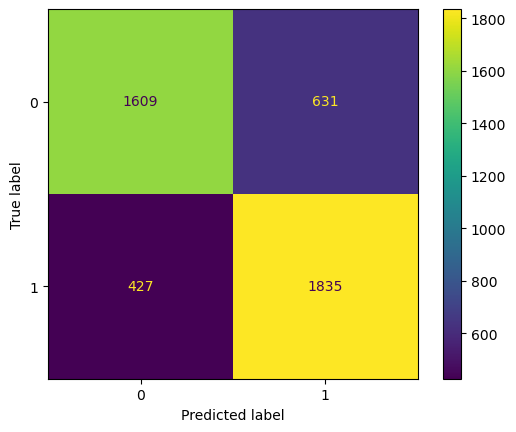

In [97]:
cm = confusion_matrix(y_test, y_pred, labels=CB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CB.classes_)
disp.plot()

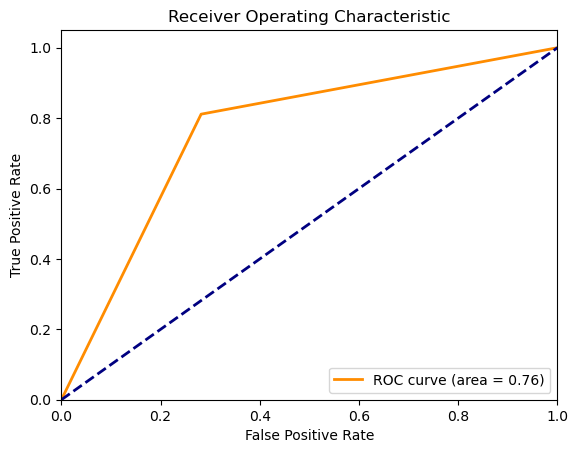

In [98]:
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(verbose = 3)

rf.fit(X = X_train, y=  y_train)

y_pred = rf.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [100]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7536650377609951
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      2240
           1       0.74      0.79      0.76      2262

    accuracy                           0.75      4502
   macro avg       0.75      0.75      0.75      4502
weighted avg       0.75      0.75      0.75      4502

[[1605  635]
 [ 474 1788]]


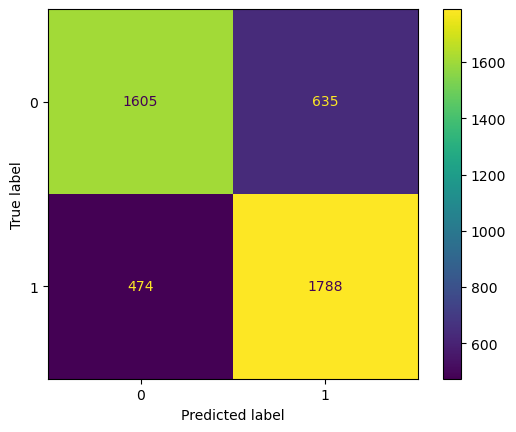

In [101]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

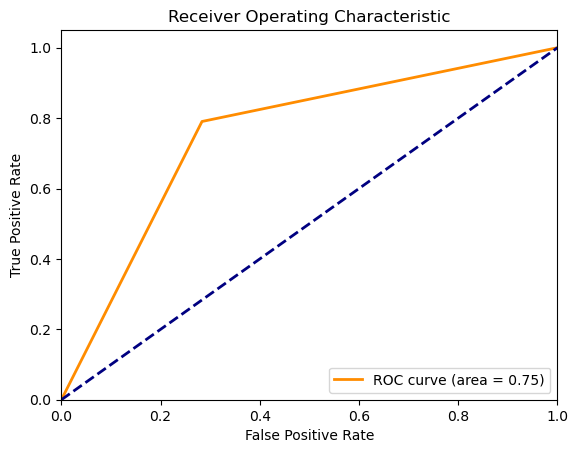

In [102]:
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [103]:


y = df['Heart_Disease']
X = df.drop(columns='Heart_Disease')



In [104]:
y_pred = rf.predict(X_testU)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [105]:
print('Randonforrest')


y_pred = rf.predict(X_testU)

accuracy = accuracy_score(y_testU, y_pred)

print(f'Accuracy: {accuracy}')

print(classification_report(y_testU, y_pred))
print(confusion_matrix(y_testU, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Randonforrest
Accuracy: 0.7195169332383604
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     28421
           1       0.19      0.80      0.31      2465

    accuracy                           0.72     30886
   macro avg       0.59      0.76      0.57     30886
weighted avg       0.91      0.72      0.78     30886

[[20254  8167]
 [  496  1969]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [106]:
print('Catboost')

y_pred = CB.predict(X_testU)

accuracy = accuracy_score(y_testU, y_pred)

print(f'Accuracy: {accuracy}')

print(classification_report(y_testU, y_pred))
print(confusion_matrix(y_testU, y_pred))

Catboost
Accuracy: 0.7229165317619634
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     28421
           1       0.20      0.81      0.32      2465

    accuracy                           0.72     30886
   macro avg       0.59      0.76      0.57     30886
weighted avg       0.92      0.72      0.79     30886

[[20327  8094]
 [  464  2001]]


In [107]:
print('XGboostClassifier')

y_pred = XGBC.predict(X_testU)

accuracy = accuracy_score(y_testU, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_testU, y_pred))
print(confusion_matrix(y_testU, y_pred))

XGboostClassifier
Accuracy: 0.7184484879880852
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     28421
           1       0.19      0.81      0.31      2465

    accuracy                           0.72     30886
   macro avg       0.59      0.76      0.57     30886
weighted avg       0.91      0.72      0.78     30886

[[20205  8216]
 [  480  1985]]


## Feature importances

In [108]:
RFFI = rf.feature_importances_
features = X.columns
RFfi = pd.DataFrame(index = features,  data = RFFI, columns=["RFFEATUREIMPORTANCE"])
RFfi = RFfi['RFFEATUREIMPORTANCE'].sort_values(ascending=False)

In [109]:
CBFI = CB.feature_importances_
features = X.columns
CBfi = pd.DataFrame(index = features,  data = CBFI, columns=["CBFEATUREIMPORTANCE"])
CBfi = CBfi['CBFEATUREIMPORTANCE'].sort_values(ascending=False)

In [110]:
XGBCFI = XGBC.feature_importances_
features = X.columns
XGBCFI = pd.DataFrame(index = features,  data = XGBCFI, columns=["XGBFIFEATUREIMPORTANCE"])
XGBCFI = XGBCFI['XGBFIFEATUREIMPORTANCE'].sort_values(ascending=False)

[Text(0, 0, 'Age_Category'),
 Text(1, 0, 'General_Health'),
 Text(2, 0, 'IsMale'),
 Text(3, 0, 'Diabetes__Yes'),
 Text(4, 0, 'Arthritis'),
 Text(5, 0, 'Smoking_History'),
 Text(6, 0, 'Diabetes__No'),
 Text(7, 0, 'Checkup'),
 Text(8, 0, 'Depression'),
 Text(9, 0, 'Other_Cancer'),
 Text(10, 0, 'Skin_Cancer'),
 Text(11, 0, 'Alcohol_Consumption'),
 Text(12, 0, 'Weight_(kg)'),
 Text(13, 0, 'Fruit_Consumption'),
 Text(14, 0, 'Exercise'),
 Text(15, 0, 'BMI'),
 Text(16, 0, 'Green_Vegetables_Consumption'),
 Text(17, 0, 'FriedPotato_Consumption'),
 Text(18, 0, 'Diabetes__No, pre-diabetes or borderline diabetes'),
 Text(19, 0, 'Height_(cm)'),
 Text(20, 0, 'Diabetes__Yes, but female told only during pregnancy')]

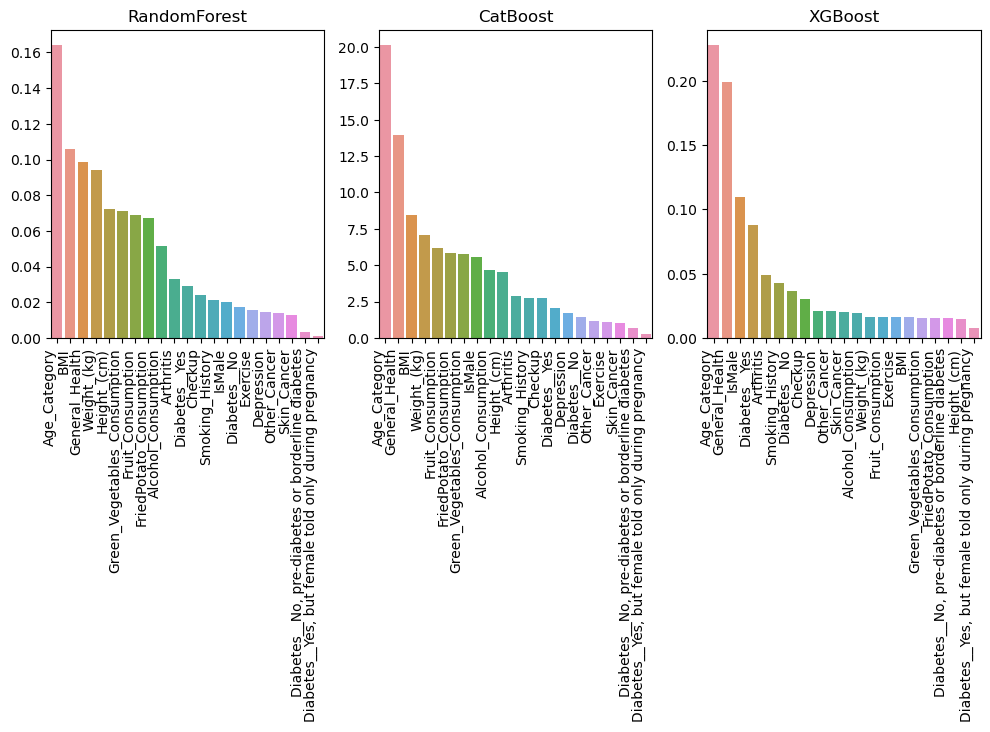

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))


sns.barplot(y = RFfi.values, x = RFfi.index, ax=axes[0])

axes[0].set_title('RandomForest')

sns.barplot(y = CBfi.values, x = CBfi.index, ax=axes[1])

axes[1].set_title('CatBoost')

sns.barplot(y = XGBCFI.values, x = XGBCFI.index, ax=axes[2])

axes[2].set_title('XGBoost')




axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90, ha='right')

In [112]:
### criar um modelo diminuindo o numero de features e ver como os resultados vai se comportar.

In [113]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
featuresordenadasparaRF = RFfi.index
lenfeatures = len(featuresordenadasparaRF)

recallrf = []
accuracyrf = []
precisionrf = []
f1rf = []

recallrfdb = []
accuracyrfdb = []
precisionrfdb = []
f1rfdb = []


for n in range(1, lenfeatures):
    features = featuresordenadasparaRF[0:-n]
    NewX_train= X_train[features]##Xtrain com menos features, pegando só as mais importantes para o modelo
    
    rf = RandomForestClassifier(verbose = 0)##treina o randomforest
    rf.fit(X = NewX_train, y=  y_train)
    y_pred = rf.predict(X_test[features])
    
    y_predU = rf.predict(X_testU[features])
    
    print(f'\n todas as features menos {n}')
    print(f' n = {n} recall = {recall_score(y_test, y_pred)} Valores desbalanceados: {recall_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} accuracy_score = {accuracy_score(y_test, y_pred)} Valores desbalanceados: {accuracy_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} precision_score = {precision_score(y_test, y_pred)} Valores desbalanceados: {precision_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} f1_score = {f1_score(y_test, y_pred)} Valores desbalanceados: {f1_score(y_testU, y_predU)}')###printa o recall
    ###criando 1 lista com os valores
    recallrf.append(recall_score(y_test, y_pred))
    accuracyrf.append(accuracy_score(y_test, y_pred))
    precisionrf.append(precision_score(y_test, y_pred))
    f1rf.append(f1_score(y_test, y_pred))
    ###criando 1 lista com os valores desbalanceados
    recallrfdb.append(recall_score(y_testU, y_predU))
    accuracyrfdb.append(accuracy_score(y_testU, y_predU))
    precisionrfdb.append(precision_score(y_testU, y_predU))
    f1rfdb.append(f1_score(y_testU, y_predU))


 todas as features menos 1
 n = 1 recall = 0.7948717948717948 Valores desbalanceados: 0.7967545638945234
 n = 1 accuracy_score = 0.7552199022656597 Valores desbalanceados: 0.7205530013598395
 n = 1 precision_score = 0.7380952380952381 Valores desbalanceados: 0.1945710322964137
 n = 1 f1_score = 0.7654320987654322 Valores desbalanceados: 0.3127637550760411

 todas as features menos 2
 n = 2 recall = 0.7970822281167109 Valores desbalanceados: 0.7971602434077079
 n = 2 accuracy_score = 0.7545535317636606 Valores desbalanceados: 0.7203263614582659
 n = 2 precision_score = 0.736218864842793 Valores desbalanceados: 0.19449668415322183
 n = 2 f1_score = 0.7654425811929527 Valores desbalanceados: 0.3126989178866964

 todas as features menos 3
 n = 3 recall = 0.7966401414677277 Valores desbalanceados: 0.7971602434077079
 n = 3 accuracy_score = 0.7534429142603287 Valores desbalanceados: 0.7205530013598395
 n = 3 precision_score = 0.734910277324633 Valores desbalanceados: 0.19463153724247226
 n 

In [114]:
##XGBOOST
featuresordenadasparaXGB = XGBCFI.index
lenfeatures = len(featuresordenadasparaXGB)
recall = []



recallXG = []
accuracyXG = []
precisionXG = []
f1XG = []

recallXGdb = []
accuracyXGdb = []
precisionXGdb = []
f1XGdb = []


for n in range(1, lenfeatures):
    features = featuresordenadasparaXGB[0:-n]
    NewX_train= X_train[features]##Xtrain com menos features, pegando só as mais importantes para o modelo
    
    XGBC = XGBClassifier(objective='binary:logistic')##treina o XGB
    XGBC.fit(X = NewX_train, y=  y_train)
    y_pred = XGBC.predict(X_test[features])
    
    y_predU = XGBC.predict(X_testU[features])
    
    print(f'\n todas as features menos {n}')
    print(f' n = {n} recall = {recall_score(y_test, y_pred)} Valores desbalanceados: {recall_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} accuracy_score = {accuracy_score(y_test, y_pred)} Valores desbalanceados: {accuracy_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} precision_score = {precision_score(y_test, y_pred)} Valores desbalanceados: {precision_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} f1_score = {f1_score(y_test, y_pred)} Valores desbalanceados: {f1_score(y_testU, y_predU)}')###printa o recall
    
    recallXG.append(recall_score(y_test, y_pred))
    accuracyXG.append(accuracy_score(y_test, y_pred))
    precisionXG.append(precision_score(y_test, y_pred))
    f1XG.append(f1_score(y_test, y_pred))
    ###criando 1 lista com os valores desbalanceados
    recallXGdb.append(recall_score(y_testU, y_predU))
    accuracyXGdb.append(accuracy_score(y_testU, y_predU))
    precisionXGdb.append(precision_score(y_testU, y_predU))
    f1XGdb.append(f1_score(y_testU, y_predU))


 todas as features menos 1
 n = 1 recall = 0.8015030946065429 Valores desbalanceados: 0.7991886409736308
 n = 1 accuracy_score = 0.7567747667703243 Valores desbalanceados: 0.7200025901703037
 n = 1 precision_score = 0.7372915819438797 Valores desbalanceados: 0.1946063419934802
 n = 1 f1_score = 0.768057614912095 Valores desbalanceados: 0.31299650460756273

 todas as features menos 2
 n = 2 recall = 0.8010610079575596 Valores desbalanceados: 0.8004056795131845
 n = 2 accuracy_score = 0.7578853842736561 Valores desbalanceados: 0.718869390662436
 n = 2 precision_score = 0.7389885807504079 Valores desbalanceados: 0.19411648957103503
 n = 2 f1_score = 0.7687738650827323 Valores desbalanceados: 0.3124554596563465

 todas as features menos 3
 n = 3 recall = 0.8063660477453581 Valores desbalanceados: 0.7987829614604463
 n = 3 accuracy_score = 0.7618836072856509 Valores desbalanceados: 0.7199702130415074
 n = 3 precision_score = 0.74206672091131 Valores desbalanceados: 0.19452677336494764
 n =

In [115]:
featuresordenadasparaCBFI = CBfi.index
lenfeatures = len(featuresordenadasparaXGB)
recall = []

recallCB = []
accuracyCB = []
precisionCB = []
f1CB = []

recallCBdb = []
accuracyCBdb = []
precisionCBdb = []
f1CBdb = []




for n in range(1, lenfeatures):
    features = featuresordenadasparaXGB[0:-n]
    NewX_train= X_train[features]##Xtrain com menos features, pegando só as mais importantes para o modelo
    
    CB = CatBoostClassifier(verbose=False)##treina o XGB
    CB.fit(X = NewX_train, y=  y_train)
    y_pred = CB.predict(X_test[features])
    
    y_predU = CB.predict(X_testU[features])
    
    print(f'\n todas as features menos {n}')
    print(f' n = {n} recall = {recall_score(y_test, y_pred)} Valores desbalanceados: {recall_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} accuracy_score = {accuracy_score(y_test, y_pred)} Valores desbalanceados: {accuracy_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} precision_score = {precision_score(y_test, y_pred)} Valores desbalanceados: {precision_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} f1_score = {f1_score(y_test, y_pred)} Valores desbalanceados: {f1_score(y_testU, y_predU)}')###printa o recall
    recallCB.append(recall_score(y_test, y_pred))
    accuracyCB.append(accuracy_score(y_test, y_pred))
    precisionCB.append(precision_score(y_test, y_pred))
    f1CB.append(f1_score(y_test, y_pred))
    ###criando 1 lista com os valores desbalanceados
    recallCBdb.append(recall_score(y_testU, y_predU))
    accuracyCBdb.append(accuracy_score(y_testU, y_predU))
    precisionCBdb.append(precision_score(y_testU, y_predU))
    f1CBdb.append(f1_score(y_testU, y_predU))
    
    


 todas as features menos 1
 n = 1 recall = 0.8160919540229885 Valores desbalanceados: 0.8141987829614604
 n = 1 accuracy_score = 0.7661039537983119 Valores desbalanceados: 0.7240173541410347
 n = 1 precision_score = 0.743455497382199 Valores desbalanceados: 0.1992455077931103
 n = 1 f1_score = 0.7780821917808219 Valores desbalanceados: 0.32014675386824054

 todas as features menos 2
 n = 2 recall = 0.8063660477453581 Valores desbalanceados: 0.8174442190669371
 n = 2 accuracy_score = 0.7614393602843181 Valores desbalanceados: 0.7231755487923331
 n = 2 precision_score = 0.7414634146341463 Valores desbalanceados: 0.19920909540286702
 n = 2 f1_score = 0.772554002541296 Valores desbalanceados: 0.32034976152623207

 todas as features menos 3
 n = 3 recall = 0.8072502210433244 Valores desbalanceados: 0.8141987829614604
 n = 3 accuracy_score = 0.7623278542869836 Valores desbalanceados: 0.7235316972090915
 n = 3 precision_score = 0.7422764227642277 Valores desbalanceados: 0.198949246629659
 n 

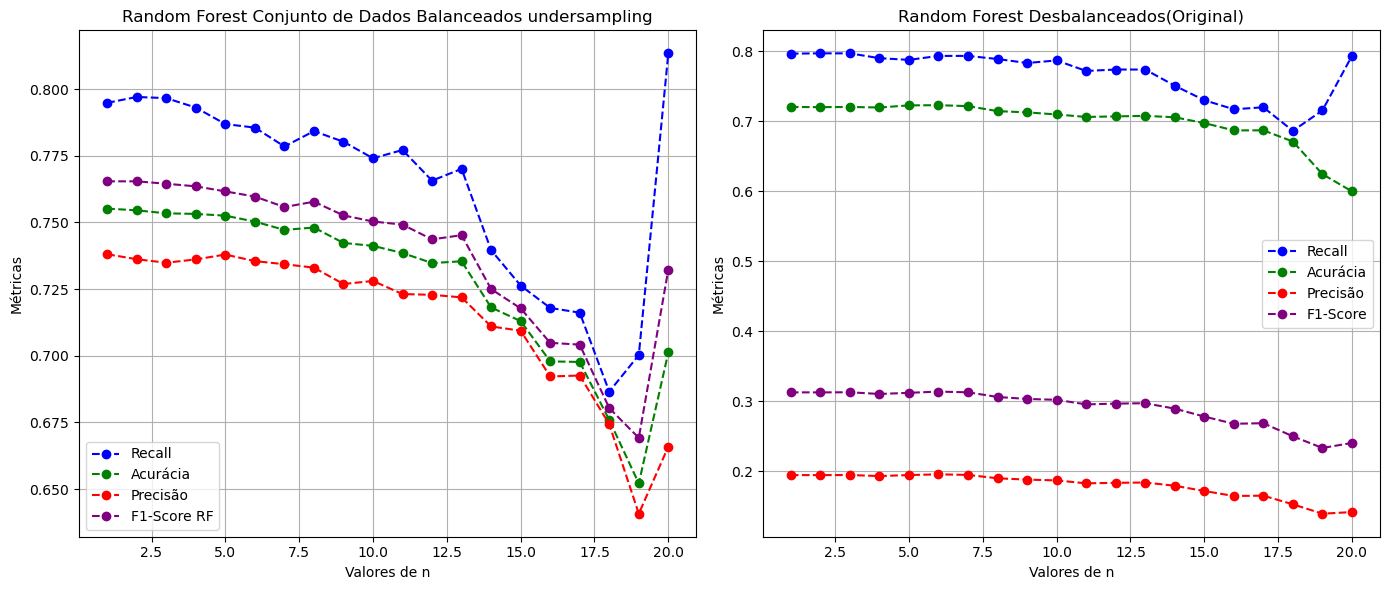

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
n = np.linspace(1, 20, 20)
# Primeiro subplot para o conjunto de dados RF
axes[0].plot(n, recallrf, label='Recall', marker='o', linestyle='--', color='b')
axes[0].plot(n, accuracyrf, label='Acurácia', marker='o', linestyle='--', color='g')
axes[0].plot(n, precisionrf, label='Precisão', marker='o', linestyle='--', color='r')
axes[0].plot(n, f1rf, label='F1-Score RF', marker='o', linestyle='--', color='purple')
axes[0].set_title('Random Forest Conjunto de Dados Balanceados undersampling')
axes[0].set_xlabel('Valores de n')
axes[0].set_ylabel('Métricas')
axes[0].legend()
axes[0].grid(True)

# Segundo subplot para o conjunto de dados RFDB
axes[1].plot(n, recallrfdb, label='Recall', marker='o', linestyle='--', color='b')
axes[1].plot(n, accuracyrfdb, label='Acurácia', marker='o', linestyle='--', color='g')
axes[1].plot(n, precisionrfdb, label='Precisão', marker='o', linestyle='--', color='r')
axes[1].plot(n, f1rfdb, label='F1-Score', marker='o', linestyle='--', color='purple')
axes[1].set_title('Random Forest Desbalanceados(Original)')
axes[1].set_xlabel('Valores de n')
axes[1].set_ylabel('Métricas')
axes[1].legend()
axes[1].grid(True)
# Exibir os subplots
plt.tight_layout()
plt.show()

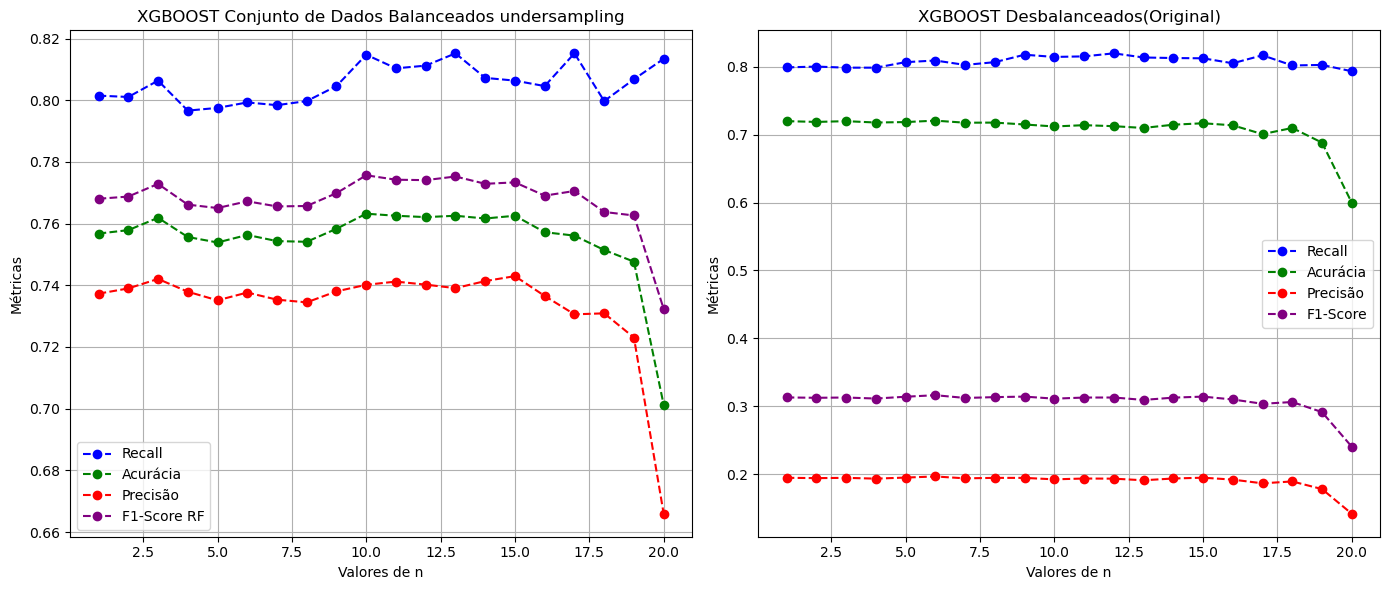

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
n = np.linspace(1, 20, 20)
# Primeiro subplot para o conjunto de dados RF
axes[0].plot(n, recallXG, label='Recall', marker='o', linestyle='--', color='b')
axes[0].plot(n, accuracyXG, label='Acurácia', marker='o', linestyle='--', color='g')
axes[0].plot(n, precisionXG, label='Precisão', marker='o', linestyle='--', color='r')
axes[0].plot(n, f1XG, label='F1-Score RF', marker='o', linestyle='--', color='purple')
axes[0].set_title('XGBOOST Conjunto de Dados Balanceados undersampling')
axes[0].set_xlabel('Valores de n')
axes[0].set_ylabel('Métricas')
axes[0].legend()
axes[0].grid(True)

# Segundo subplot para o conjunto de dados RFDB
axes[1].plot(n, recallXGdb, label='Recall', marker='o', linestyle='--', color='b')
axes[1].plot(n, accuracyXGdb, label='Acurácia', marker='o', linestyle='--', color='g')
axes[1].plot(n, precisionXGdb, label='Precisão', marker='o', linestyle='--', color='r')
axes[1].plot(n, f1XGdb, label='F1-Score', marker='o', linestyle='--', color='purple')
axes[1].set_title('XGBOOST Desbalanceados(Original)')
axes[1].set_xlabel('Valores de n')
axes[1].set_ylabel('Métricas')
axes[1].legend()
axes[1].grid(True)
# Exibir os subplots
plt.tight_layout()
plt.show()

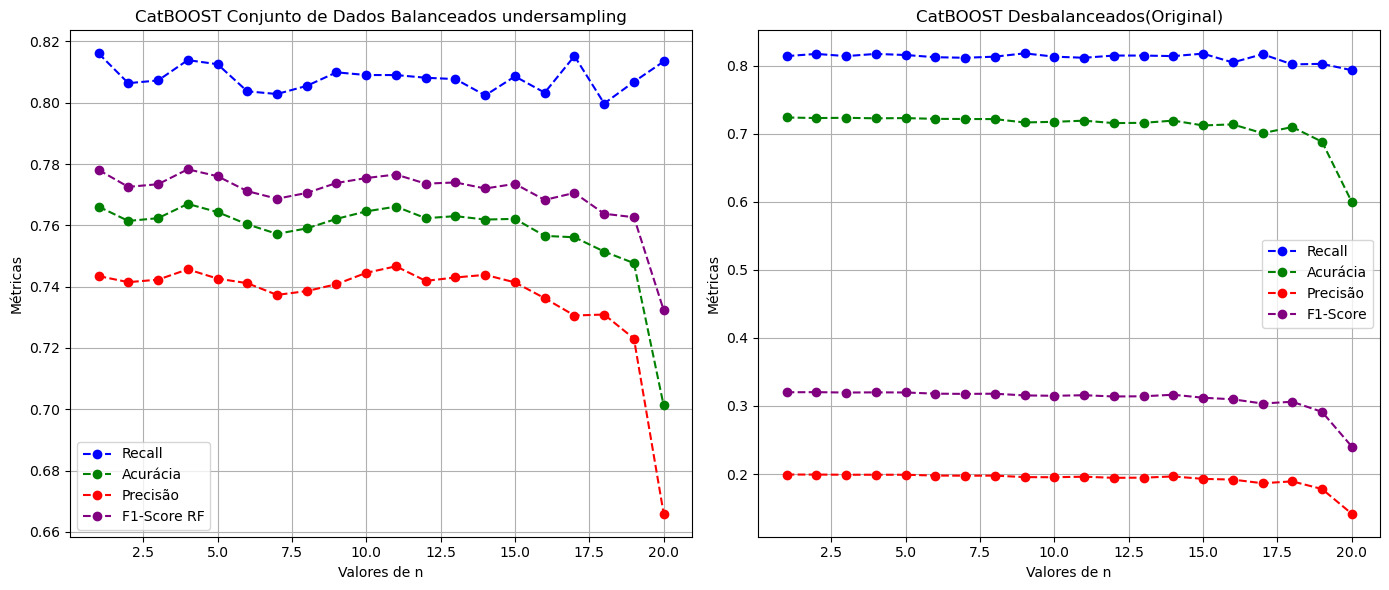

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
n = np.linspace(1, 20, 20)
# Primeiro subplot para o conjunto de dados RF
axes[0].plot(n, recallCB, label='Recall', marker='o', linestyle='--', color='b')
axes[0].plot(n, accuracyCB, label='Acurácia', marker='o', linestyle='--', color='g')
axes[0].plot(n, precisionCB, label='Precisão', marker='o', linestyle='--', color='r')
axes[0].plot(n, f1CB, label='F1-Score RF', marker='o', linestyle='--', color='purple')
axes[0].set_title('CatBOOST Conjunto de Dados Balanceados undersampling')
axes[0].set_xlabel('Valores de n')
axes[0].set_ylabel('Métricas')
axes[0].legend()
axes[0].grid(True)

# Segundo subplot para o conjunto de dados RFDB
axes[1].plot(n, recallCBdb, label='Recall', marker='o', linestyle='--', color='b')
axes[1].plot(n, accuracyCBdb, label='Acurácia', marker='o', linestyle='--', color='g')
axes[1].plot(n, precisionCBdb, label='Precisão', marker='o', linestyle='--', color='r')
axes[1].plot(n, f1CBdb, label='F1-Score', marker='o', linestyle='--', color='purple')
axes[1].set_title('CatBOOST Desbalanceados(Original)')
axes[1].set_xlabel('Valores de n')
axes[1].set_ylabel('Métricas')
axes[1].legend()
axes[1].grid(True)
# Exibir os subplots
plt.tight_layout()
plt.show()

In [119]:
from sklearn.ensemble import VotingClassifier




In [120]:
from sklearn.ensemble import VotingClassifier

featuresordenadasparaRF = RFfi.index
lenfeatures = len(featuresordenadasparaRF)

recallSOFT = []
accuracySOFT = []
precisionSOFT = []
f1SOFT = []

recallSOFTdb = []
accuracySOFTdb = []
precisionSOFTdb = []
f1SOFTdb = []



    

for n in range(1, lenfeatures):
    features = featuresordenadasparaRF[0:-n]
    NewX_train= X_train[features]##Xtrain com menos features, pegando só as mais importantes para o modelo
    
    
    CB = CatBoostClassifier(verbose = 0)
    XGBC = XGBClassifier()
    rf = RandomForestClassifier()
    
    ensemblesoft = VotingClassifier(estimators=[
        ('catboost', CB),
        ('xgboost', XGBC),
        ('randomforest', rf)
        ], voting='soft')

    ensemblesoft.fit(X = NewX_train, y=  y_train)

    y_pred = ensemblesoft.predict(X_test[features])
    
    y_predU = ensemblesoft.predict(X_testU[features])
    
    print(f'\n todas as features menos {n}')
    print(f' n = {n} recall = {recall_score(y_test, y_pred)} Valores desbalanceados: {recall_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} accuracy_score = {accuracy_score(y_test, y_pred)} Valores desbalanceados: {accuracy_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} precision_score = {precision_score(y_test, y_pred)} Valores desbalanceados: {precision_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} f1_score = {f1_score(y_test, y_pred)} Valores desbalanceados: {f1_score(y_testU, y_predU)}')###printa o recall
    ###criando 1 lista com os valores
    recallSOFT.append(recall_score(y_test, y_pred))
    accuracySOFT.append(accuracy_score(y_test, y_pred))
    precisionSOFT.append(precision_score(y_test, y_pred))
    f1SOFT.append(f1_score(y_test, y_pred))
    ###criando 1 lista com os valores desbalanceados
    recallSOFTdb.append(recall_score(y_testU, y_predU))
    accuracySOFTdb.append(accuracy_score(y_testU, y_predU))
    precisionSOFTdb.append(precision_score(y_testU, y_predU))
    f1SOFTdb.append(f1_score(y_testU, y_predU))


 todas as features menos 1
 n = 1 recall = 0.812555260831123 Valores desbalanceados: 0.8121703853955375
 n = 1 accuracy_score = 0.763216348289649 Valores desbalanceados: 0.7190960305640096
 n = 1 precision_score = 0.7411290322580645 Valores desbalanceados: 0.19598629466470877
 n = 1 f1_score = 0.7752003374103754 Valores desbalanceados: 0.31577287066246057

 todas as features menos 2
 n = 2 recall = 0.8129973474801061 Valores desbalanceados: 0.8117647058823529
 n = 2 accuracy_score = 0.7652154597956464 Valores desbalanceados: 0.719452178980768
 n = 2 precision_score = 0.7436312171451678 Valores desbalanceados: 0.1961380121544795
 n = 2 f1_score = 0.7767687434002112 Valores desbalanceados: 0.31593905423541485

 todas as features menos 3
 n = 3 recall = 0.8050397877984085 Valores desbalanceados: 0.8081135902636917
 n = 3 accuracy_score = 0.7614393602843181 Valores desbalanceados: 0.720488247102247
 n = 3 precision_score = 0.7420537897310513 Valores desbalanceados: 0.19621749408983452
 n 

In [121]:
from sklearn.ensemble import VotingClassifier

featuresordenadasparaRF = RFfi.index
lenfeatures = len(featuresordenadasparaRF)

recallHARD = []
accuracyHARD = []
precisionHARD = []
f1HARD = []

recallHARDdb = []
accuracyHARDdb = []
precisionHARDdb = []
f1HARDdb = []



    

for n in range(1, lenfeatures):
    features = featuresordenadasparaRF[0:-n]
    NewX_train= X_train[features]##Xtrain com menos features, pegando só as mais importantes para o modelo
    
    
    CB = CatBoostClassifier(verbose = 0)
    XGBC = XGBClassifier()
    rf = RandomForestClassifier()
    
    ensemblehard = VotingClassifier(estimators=[
        ('catboost', CB),
        ('xgboost', XGBC),
        ('randomforest', rf)
        ], voting='hard')

    ensemblehard.fit(X = NewX_train, y=  y_train)

    y_pred = ensemblehard.predict(X_test[features])
    
    y_predU = ensemblehard.predict(X_testU[features])
    
    print(f'\n todas as features menos {n}')
    print(f' n = {n} recall = {recall_score(y_test, y_pred)} Valores desbalanceados: {recall_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} accuracy_score = {accuracy_score(y_test, y_pred)} Valores desbalanceados: {accuracy_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} precision_score = {precision_score(y_test, y_pred)} Valores desbalanceados: {precision_score(y_testU, y_predU)}')###printa o recall
    print(f' n = {n} f1_score = {f1_score(y_test, y_pred)} Valores desbalanceados: {f1_score(y_testU, y_predU)}')###printa o recall
    ###criando 1 lista com os valores
    recallHARD.append(recall_score(y_test, y_pred))
    accuracyHARD.append(accuracy_score(y_test, y_pred))
    precisionHARD.append(precision_score(y_test, y_pred))
    f1HARD.append(f1_score(y_test, y_pred))
    ###criando 1 lista com os valores desbalanceados
    recallHARDdb.append(recall_score(y_testU, y_predU))
    accuracyHARDdb.append(accuracy_score(y_testU, y_predU))
    precisionHARDdb.append(precision_score(y_testU, y_predU))
    f1HARDdb.append(f1_score(y_testU, y_predU))


 todas as features menos 1
 n = 1 recall = 0.8103448275862069 Valores desbalanceados: 0.8089249492900609
 n = 1 accuracy_score = 0.7634384717903154 Valores desbalanceados: 0.720488247102247
 n = 1 precision_score = 0.7424058323207776 Valores desbalanceados: 0.196337140606538
 n = 1 f1_score = 0.7748890298034242 Valores desbalanceados: 0.3159813010062594

 todas as features menos 2
 n = 2 recall = 0.812555260831123 Valores desbalanceados: 0.8121703853955375
 n = 2 accuracy_score = 0.7638827187916482 Valores desbalanceados: 0.7210710354205789
 n = 2 precision_score = 0.7420266451352443 Valores desbalanceados: 0.19716367933819184
 n = 2 f1_score = 0.7756910740662588 Valores desbalanceados: 0.3172993105634361

 todas as features menos 3
 n = 3 recall = 0.8072502210433244 Valores desbalanceados: 0.8085192697768763
 n = 3 accuracy_score = 0.7641048422923146 Valores desbalanceados: 0.7210710354205789
 n = 3 precision_score = 0.7446982055464927 Valores desbalanceados: 0.19662588792423047
 n =

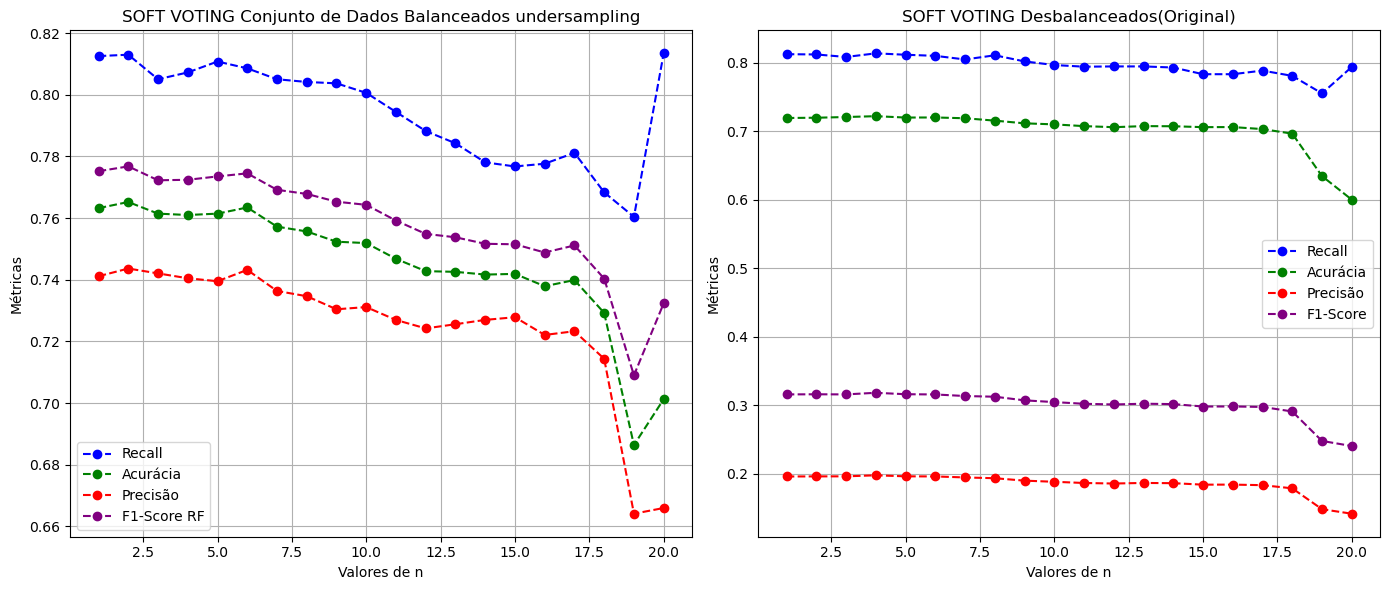

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

n = np.linspace(1, 20, 20)


# Primeiro subplot para o conjunto de dados RF
axes[0].plot(n, recallSOFT, label='Recall', marker='o', linestyle='--', color='b')
axes[0].plot(n, accuracySOFT, label='Acurácia', marker='o', linestyle='--', color='g')
axes[0].plot(n, precisionSOFT, label='Precisão', marker='o', linestyle='--', color='r')
axes[0].plot(n, f1SOFT, label='F1-Score RF', marker='o', linestyle='--', color='purple')
axes[0].set_title('SOFT VOTING Conjunto de Dados Balanceados undersampling')
axes[0].set_xlabel('Valores de n')
axes[0].set_ylabel('Métricas')
axes[0].legend()
axes[0].grid(True)

# Segundo subplot para o conjunto de dados RFDB
axes[1].plot(n, recallSOFTdb, label='Recall', marker='o', linestyle='--', color='b')
axes[1].plot(n, accuracySOFTdb, label='Acurácia', marker='o', linestyle='--', color='g')
axes[1].plot(n, precisionSOFTdb, label='Precisão', marker='o', linestyle='--', color='r')
axes[1].plot(n, f1SOFTdb, label='F1-Score', marker='o', linestyle='--', color='purple')
axes[1].set_title('SOFT VOTING Desbalanceados(Original)')
axes[1].set_xlabel('Valores de n')
axes[1].set_ylabel('Métricas')
axes[1].legend()
axes[1].grid(True)
# Exibir os subplots
plt.tight_layout()
plt.show()

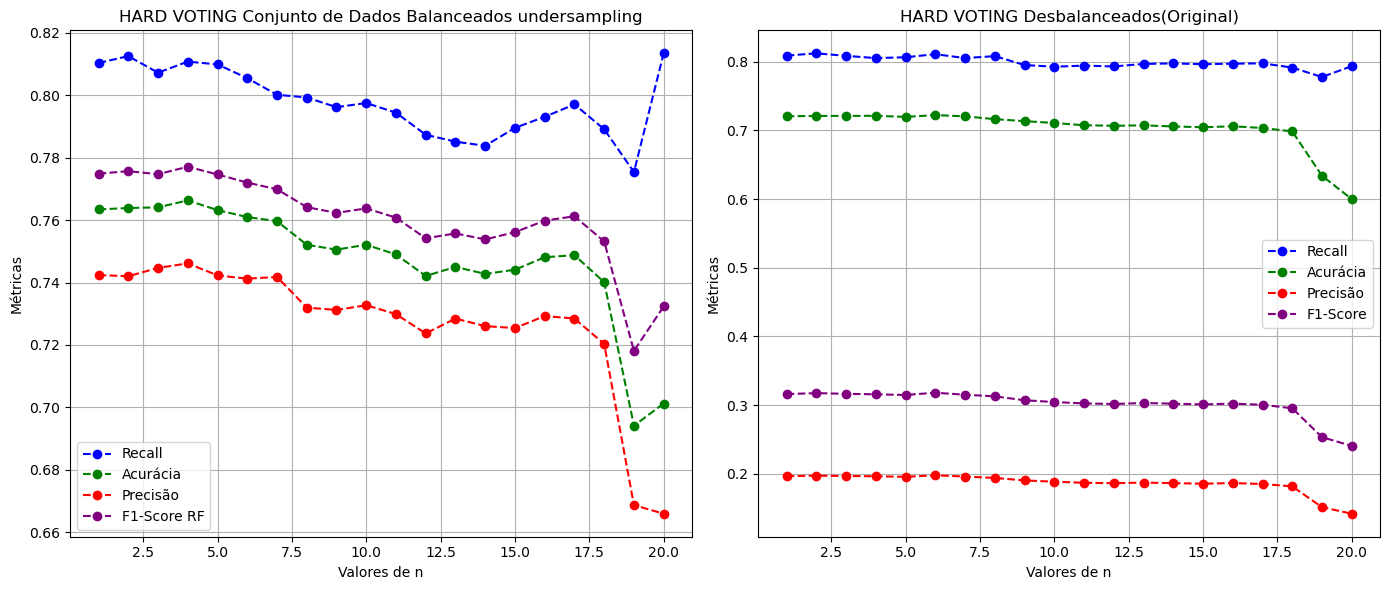

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

n = np.linspace(1, 20, 20)

# Primeiro subplot para o conjunto de dados RF
axes[0].plot(n, recallHARD, label='Recall', marker='o', linestyle='--', color='b')
axes[0].plot(n, accuracyHARD, label='Acurácia', marker='o', linestyle='--', color='g')
axes[0].plot(n, precisionHARD, label='Precisão', marker='o', linestyle='--', color='r')
axes[0].plot(n, f1HARD, label='F1-Score RF', marker='o', linestyle='--', color='purple')
axes[0].set_title('HARD VOTING Conjunto de Dados Balanceados undersampling')
axes[0].set_xlabel('Valores de n')
axes[0].set_ylabel('Métricas')
axes[0].legend()
axes[0].grid(True)

# Segundo subplot para o conjunto de dados RFDB
axes[1].plot(n, recallHARDdb, label='Recall', marker='o', linestyle='--', color='b')
axes[1].plot(n, accuracyHARDdb, label='Acurácia', marker='o', linestyle='--', color='g')
axes[1].plot(n, precisionHARDdb, label='Precisão', marker='o', linestyle='--', color='r')
axes[1].plot(n, f1HARDdb, label='F1-Score', marker='o', linestyle='--', color='purple')
axes[1].set_title('HARD VOTING Desbalanceados(Original)')
axes[1].set_xlabel('Valores de n')
axes[1].set_ylabel('Métricas')
axes[1].legend()
axes[1].grid(True)
# Exibir os subplots
plt.tight_layout()
plt.show()